# Hyndai Car Price Prediction - Team DevSpark

## Import the neccessary libraries

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 01. Data collection

In [105]:
# Load the datset
df = pd.read_csv("car_price_prediction.csv")

In [106]:
print(f'Dataset Shape : {df.shape}')

Dataset Shape : (19238, 18)


Check the columns:

In [107]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [108]:
# Get sample data
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45798484,51746,-,GAZ,20,1953,Sedan,No,Petrol,2,0 km,4,Manual,Rear,4-May,Left wheel,Beige,0
1,45792773,3200,-,GAZ,20,1953,Jeep,No,Petrol,3.2,100000 km,4,Manual,4x4,2-Mar,Left wheel,Green,0
2,45791976,7840,-,GAZ,21,1964,Sedan,No,Petrol,2.4,0 km,4,Manual,Rear,4-May,Left wheel,Sky blue,0
3,45812939,5331,-,GAZ,24,1990,Universal,Yes,Petrol,6.3,2000 km,8,Manual,4x4,2-Mar,Left wheel,Green,0
4,45782173,1300,-,AUDI,50,2018,Coupe,Yes,Petrol,0.5,4000 km,1,Tiptronic,Rear,>5,Right-hand drive,Blue,0


### By assuming the car dealer is selling only Hyundai vehicles

In [109]:
# Remove the rows that not having Manufacturer as TOYOTA
df = df[df['Manufacturer'] == 'HYUNDAI']

In [110]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
1065,44909661,21326,-,HYUNDAI,Accent,2016,Sedan,No,Petrol,1.6,80000 km,4,Tiptronic,Front,4-May,Left wheel,White,6
1066,45801440,9408,531,HYUNDAI,Accent,2012,Hatchback,Yes,Diesel,1.6,60480 km,4,Automatic,Front,4-May,Left wheel,White,4
1067,45791284,17249,629,HYUNDAI,Accent,2015,Sedan,No,Petrol,1.6,144000 km,4,Automatic,Front,>5,Left wheel,Grey,0
1068,45801437,13877,531,HYUNDAI,Accent,2012,Sedan,Yes,Diesel,1.6,213131 km,4,Automatic,Front,4-May,Left wheel,Grey,4
1069,45793316,14113,-,HYUNDAI,Accent,2013,Hatchback,No,Petrol,1.6,136000 km,4,Tiptronic,Front,4-May,Left wheel,White,6


In [111]:
df.shape

(3769, 18)

In [112]:
# Count the no of accurances of each class in the 'category' column
df['Category'].value_counts()

Category
Sedan          2115
Jeep           1011
Minivan         286
Universal       143
Coupe           102
Hatchback       102
Microbus          6
Pickup            2
Goods wagon       2
Name: count, dtype: int64

In [113]:
# Count the no of accurances of each class in the 'Model' column
df['Model'].value_counts()

Model
Sonata             1080
Elantra             922
Santa FE            533
H1                  437
Tucson              429
                   ... 
Veloster remix        1
Veloster R-spec       1
Veloster Turbo        1
Veloster TURBO        1
Veracruz              1
Name: count, Length: 70, dtype: int64

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3769 entries, 1065 to 18177
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                3769 non-null   int64 
 1   Price             3769 non-null   int64 
 2   Levy              3769 non-null   object
 3   Manufacturer      3769 non-null   object
 4   Model             3769 non-null   object
 5   Prod. year        3769 non-null   int64 
 6   Category          3769 non-null   object
 7   Leather interior  3769 non-null   object
 8   Fuel type         3769 non-null   object
 9   Engine volume     3769 non-null   object
 10  Mileage           3769 non-null   object
 11  Cylinders         3769 non-null   int64 
 12  Gear box type     3769 non-null   object
 13  Drive wheels      3769 non-null   object
 14  Doors             3769 non-null   object
 15  Wheel             3769 non-null   object
 16  Color             3769 non-null   object
 17  Airbags        

In [115]:
# Check Missing value
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

## 02. Feature Engineering

### Drop irrelavant columns.

In [116]:
# Remove the 'ID' columns
removed_column = ['ID', 'Levy']

df = df.drop(removed_column, axis=1)

In [117]:
df.head()

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
1065,21326,HYUNDAI,Accent,2016,Sedan,No,Petrol,1.6,80000 km,4,Tiptronic,Front,4-May,Left wheel,White,6
1066,9408,HYUNDAI,Accent,2012,Hatchback,Yes,Diesel,1.6,60480 km,4,Automatic,Front,4-May,Left wheel,White,4
1067,17249,HYUNDAI,Accent,2015,Sedan,No,Petrol,1.6,144000 km,4,Automatic,Front,>5,Left wheel,Grey,0
1068,13877,HYUNDAI,Accent,2012,Sedan,Yes,Diesel,1.6,213131 km,4,Automatic,Front,4-May,Left wheel,Grey,4
1069,14113,HYUNDAI,Accent,2013,Hatchback,No,Petrol,1.6,136000 km,4,Tiptronic,Front,4-May,Left wheel,White,6


In [118]:
print(f'Dataset Shape after removing the irrelavant columns: {df.shape}')

Dataset Shape after removing the irrelavant columns: (3769, 16)


In [119]:
#Check datatype
df.dtypes

Price                int64
Manufacturer        object
Model               object
Prod. year           int64
Category            object
Leather interior    object
Fuel type           object
Engine volume       object
Mileage             object
Cylinders            int64
Gear box type       object
Drive wheels        object
Doors               object
Wheel               object
Color               object
Airbags              int64
dtype: object

In [120]:
#Check statistics of data set
df.describe()

,Price,Prod. year,Cylinders,Airbags
count,3769.000000,3769.000000,3769.000000,3769.000000
mean,22606.823295,2013.701247,4.033961,5.086760
std,16092.505586,2.635581,0.351541,2.983172
min,3.000000,1997.000000,1.000000,0.000000
25%,12544.000000,2012.000000,4.000000,4.000000
50%,18503.000000,2014.000000,4.000000,4.000000
75%,30517.000000,2016.000000,4.000000,4.000000
max,131308.000000,2020.000000,16.000000,16.000000


In [121]:
# Check the number of unique values of each column
df.nunique()

Price               1157
Manufacturer           1
Model                 70
Prod. year            20
Category               9
Leather interior       2
Fuel type              6
Engine volume         28
Mileage             2535
Cylinders              7
Gear box type          4
Drive wheels           3
Doors                  3
Wheel                  2
Color                 15
Airbags               13
dtype: int64

## Select object/ Non-object type features

In [122]:
non_ob = df.select_dtypes(exclude=object)
non_ob

,Price,Prod. year,Cylinders,Airbags
1065,21326,2016,4,6
1066,9408,2012,4,4
1067,17249,2015,4,0
1068,13877,2012,4,4
1069,14113,2013,4,6
...,...,...,...,...
18152,18660,2013,4,8
18153,19757,2014,4,6
18154,24462,2016,4,8
18155,21856,2014,4,10


In [123]:
obj = df.select_dtypes(include='object')
obj

,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
1065,HYUNDAI,Accent,Sedan,No,Petrol,1.6,80000 km,Tiptronic,Front,4-May,Left wheel,White
1066,HYUNDAI,Accent,Hatchback,Yes,Diesel,1.6,60480 km,Automatic,Front,4-May,Left wheel,White
1067,HYUNDAI,Accent,Sedan,No,Petrol,1.6,144000 km,Automatic,Front,>5,Left wheel,Grey
1068,HYUNDAI,Accent,Sedan,Yes,Diesel,1.6,213131 km,Automatic,Front,4-May,Left wheel,Grey
1069,HYUNDAI,Accent,Hatchback,No,Petrol,1.6,136000 km,Tiptronic,Front,4-May,Left wheel,White
...,...,...,...,...,...,...,...,...,...,...,...,...
18152,HYUNDAI,Veloster remix,Hatchback,No,Petrol,1.6,70400 km,Tiptronic,Front,4-May,Left wheel,Yellow
18153,HYUNDAI,Veloster R-spec,Coupe,Yes,Petrol,1.6 Turbo,96000 km,Manual,Front,2-Mar,Left wheel,Black
18154,HYUNDAI,Veloster Turbo,Hatchback,Yes,Petrol,1.6 Turbo,77000 km,Manual,Front,2-Mar,Left wheel,Golden
18155,HYUNDAI,Veloster TURBO,Hatchback,Yes,Petrol,1.6 Turbo,51000 km,Manual,Front,4-May,Left wheel,White


## 03. Data Cleaning

In [124]:
df['Model'] = df['Model'].replace({
    'Elantra 2014': 'Elantra',
    'Elantra 2016': 'Elantra',
    'Elantra GLS / LIMITED': 'Elantra GLS', 
    'Elantra gt': 'Elantra GT',
    'Elantra limited': 'Elantra Limited',
    'Elantra LIMITED': 'Elantra Limited',
    'Elantra LIMITEDI': 'Elantra Limited',
    'Elantra Se': 'Elantra SE',
    'Elantra se': 'Elantra SE',
    'H1 GRAND STAREX': 'H1 Grand Starex',
    'H1 grandstarex': 'H1 Grand Starex', 
    'H1 starixs': 'H1 Grand Starex',
    'i20': 'I30', 
    'IX35 2.0': 'IX35', 
    'Lantra LIMITED': 'Lantra', 
    'Santa FE long': 'Santa FE',
    'Santa FE sport': 'Santa FE',
    'Santa FE Ultimate': 'Santa FE',
    'Sonata 2.0t': 'Sonata',
    'Sonata 2.4L': 'Sonata',
    'Sonata blue edition': 'Sonata',
    'Sonata Hibrid': 'Sonata',
    'Sonata Hybrid': 'Sonata',
    'Sonata hybrid': 'Sonata',
    'Sonata HYBRID': 'Sonata',
    'Sonata Limited': 'Sonata',
    'Sonata LIMITED': 'Sonata',
    'Sonata LPG': 'Sonata',
    'Sonata S': 'Sonata',
    'Sonata SE LIMITED': 'Sonata',
    'Sonata sport': 'Sonata Sport',
    'Sonata SPORT': 'Sonata Sport',
    'i40': 'I30',
    'Elantra i30': 'I30',
    'Veloster remix': 'Veloster',
    'Veloster TURBO': 'Veloster Turbo',
    'Veloster R-spec': 'Veloster',
    'Elantra Gt': 'Elantra GT',
    'Elantra Limited': 'Elantra',
    'Elantra sport limited': 'Elantra Sport',
    'Tucson Se': 'Tucson SE',
    'Tucson Limited': 'Tucson',
    'Tucson TURBO': 'Tucson',
    'H1 Grand Starex': 'H1',
    })

In [125]:
df['Model'].unique()

array(['Accent', 'Accent GS', 'Accent SE', 'Azera', 'Elantra',
       'Elantra GLS', 'Elantra GS', 'Elantra GT', 'I30',
       'Elantra Limited', 'Elantra SE', 'Elantra Sport', 'Galloper',
       'Genesis', 'Getz', 'Grandeur', 'H1', 'H1 Grand Starex', 'Ioniq',
       'IX35', 'kona', 'Lantra', 'Santa FE', 'Sonata', 'Sonata SE',
       'Sonata Sport', 'Tucson', 'Tucson SE', 'Veloster',
       'Veloster Turbo', 'Veracruz'], dtype=object)

In [126]:
df['Category'].unique()

array(['Sedan', 'Hatchback', 'Coupe', 'Jeep', 'Universal', 'Minivan',
       'Microbus', 'Pickup', 'Goods wagon'], dtype=object)

In [127]:
# Get 'Model's that in Jeep Category
jeep_models = df[df['Category'] == 'Hatchback']['Model'].unique()
jeep_models

array(['Accent', 'Accent GS', 'Accent SE', 'Elantra', 'Elantra GT', 'I30',
       'Getz', 'Ioniq', 'Sonata', 'Veloster', 'Veloster Turbo'],
      dtype=object)

### Finding the duplicate values and remove them.

In [128]:
# Check Duplication
df.duplicated().value_counts()

False    3050
True      719
Name: count, dtype: int64

In [129]:
# Remove the duplicates
df.drop_duplicates(inplace=True)

In [130]:
# Check Duplicates
df.duplicated().sum()

np.int64(0)

In [131]:
# Dataframe size after removing the duplicate values
df.shape

(3050, 16)

## Finding the columns that includes zero as values

In [132]:
# Count the zeros in each column
df.isin([0]).sum()

Price                0
Manufacturer         0
Model                0
Prod. year           0
Category             0
Leather interior     0
Fuel type            0
Engine volume        0
Mileage              0
Cylinders            0
Gear box type        0
Drive wheels         0
Doors                0
Wheel                0
Color                0
Airbags             99
dtype: int64

By assuming the 'No. of airbags' cannot be zero and replace with the respective column mean and their rounded value.

In [133]:
# Replace 0 with NaN in the 'Airbags' column for proper handling
df['Airbags'] = df['Airbags'].replace(0, np.nan)

# Group by 'Category' and 'Model', then fill NaN values (previously zeros) with the rounded mean
# Ensure the mean is calculated and rounded, then filled properly
df['Airbags'] = df.groupby(['Category', 'Model'])['Airbags'].transform(lambda x: x.fillna(x.mean()).round())

# If there are still any NaN values (e.g., all 0 values for a specific group), fill with a default value (e.g., 0)
df['Airbags'].fillna(0, inplace=True)

# Check the updated 'Airbags' column
print(df['Airbags'].head())

1065    6.0
1066    4.0
1067    6.0
1068    4.0
1069    6.0
Name: Airbags, dtype: float64


In [134]:
df['Airbags'] = df['Airbags'].astype(int)

In [135]:
# Count the zeros in each column
df.isin([0]).sum()

Price               0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             1
dtype: int64

In [136]:
df.head()

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
1065,21326,HYUNDAI,Accent,2016,Sedan,No,Petrol,1.6,80000 km,4,Tiptronic,Front,4-May,Left wheel,White,6
1066,9408,HYUNDAI,Accent,2012,Hatchback,Yes,Diesel,1.6,60480 km,4,Automatic,Front,4-May,Left wheel,White,4
1067,17249,HYUNDAI,Accent,2015,Sedan,No,Petrol,1.6,144000 km,4,Automatic,Front,>5,Left wheel,Grey,6
1068,13877,HYUNDAI,Accent,2012,Sedan,Yes,Diesel,1.6,213131 km,4,Automatic,Front,4-May,Left wheel,Grey,4
1069,14113,HYUNDAI,Accent,2013,Hatchback,No,Petrol,1.6,136000 km,4,Tiptronic,Front,4-May,Left wheel,White,6


## Standarlizing values

1. In '**Mileage**' removing '**km**' and then convert them into '**float**'.

In [137]:
df['Mileage'] = df['Mileage'].str.replace('km', '').astype(float)

2. In '**Engine** volume' removing '**Turbo**' and then convert them into '**float**'.

In [138]:
df['Engine volume'] = df['Engine volume'].str.replace('Turbo', '').astype(float)

3. In '**Doors**' column normalize values and convert them into **float**.

In [139]:
# Define a mapping for the 'Door' column
door_mapping = {'4-May': 4, '2-Mar': 2}

# Replace the values in the 'Door' column
df['Doors'] = df['Doors'].replace(door_mapping)

In [140]:
# Convert all values in 'Doors' column to strings
df['Doors'] = df['Doors'].astype(str)

4. '**Price**' column is in **int** type. Convert them into **float** values.

In [141]:
# Convert all values in 'Price' column to strings
df['Price'] = df['Price'].astype(float)

In [142]:
df.head()

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
1065,21326.0,HYUNDAI,Accent,2016,Sedan,No,Petrol,1.6,80000.0,4,Tiptronic,Front,4,Left wheel,White,6
1066,9408.0,HYUNDAI,Accent,2012,Hatchback,Yes,Diesel,1.6,60480.0,4,Automatic,Front,4,Left wheel,White,4
1067,17249.0,HYUNDAI,Accent,2015,Sedan,No,Petrol,1.6,144000.0,4,Automatic,Front,>5,Left wheel,Grey,6
1068,13877.0,HYUNDAI,Accent,2012,Sedan,Yes,Diesel,1.6,213131.0,4,Automatic,Front,4,Left wheel,Grey,4
1069,14113.0,HYUNDAI,Accent,2013,Hatchback,No,Petrol,1.6,136000.0,4,Tiptronic,Front,4,Left wheel,White,6


In [143]:
df.dtypes

Price               float64
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume       float64
Mileage             float64
Cylinders             int64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [144]:
for col in non_ob:
    Q1 = non_ob[col].quantile(0.25)
    Q3 = non_ob[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = ((non_ob[col] < lower_bound) | (non_ob[col] > upper_bound)).sum()

    total_points = non_ob[col].shape[0]

    print(f"Total Outliers in {col}: {outliers} -- {round(100 * (outliers / total_points), 2)}%")

Total Outliers in Price: 110 -- 2.92%
Total Outliers in Prod. year: 8 -- 0.21%
Total Outliers in Cylinders: 63 -- 1.67%
Total Outliers in Airbags: 983 -- 26.08%


## 04. Exploratory Data Analysis

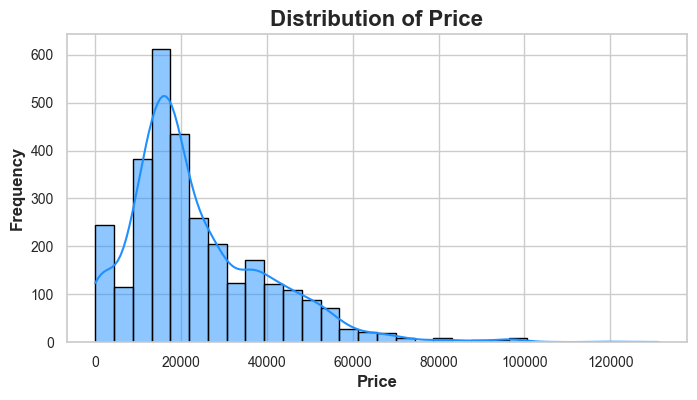

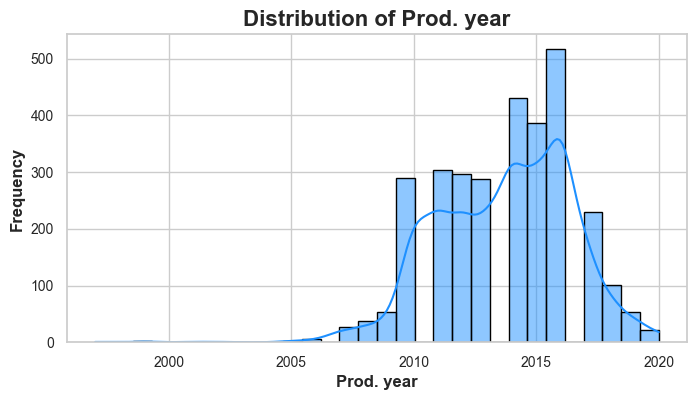

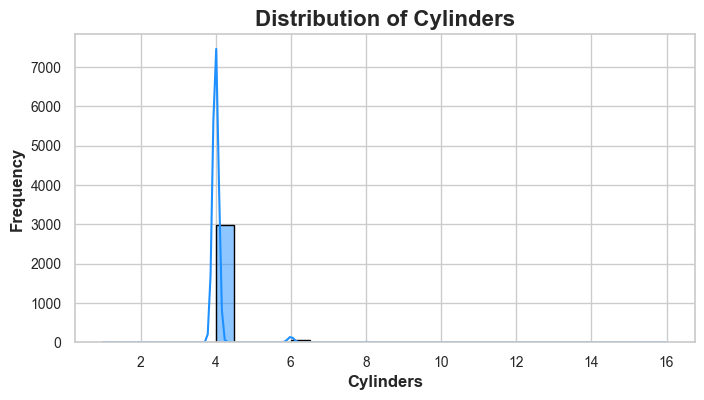

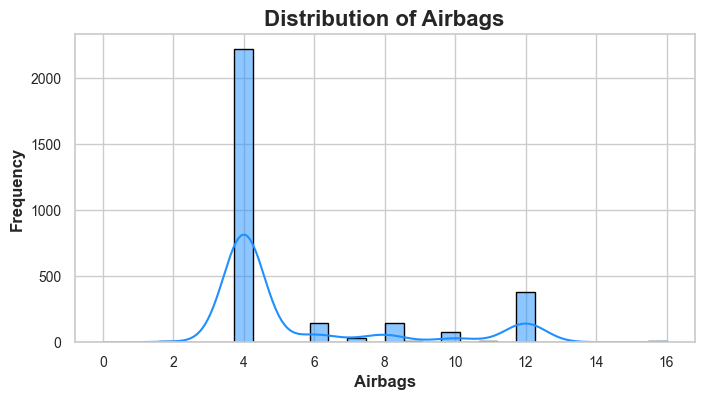

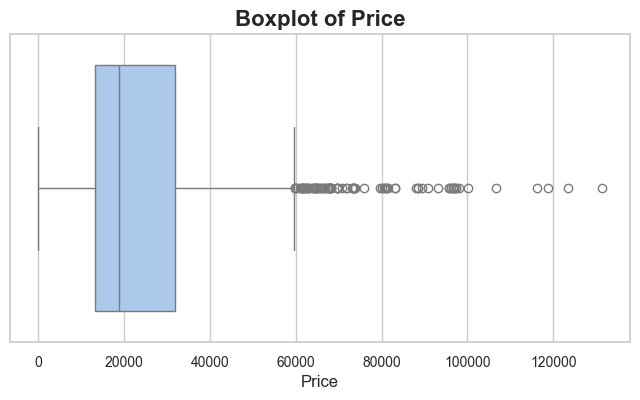

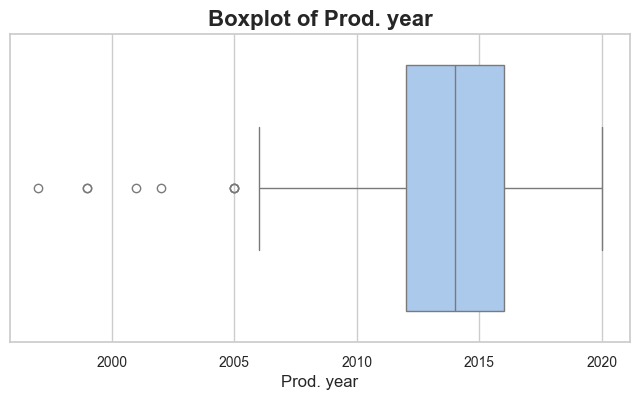

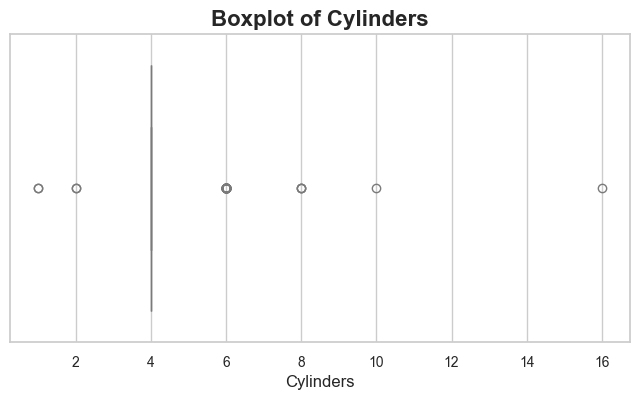

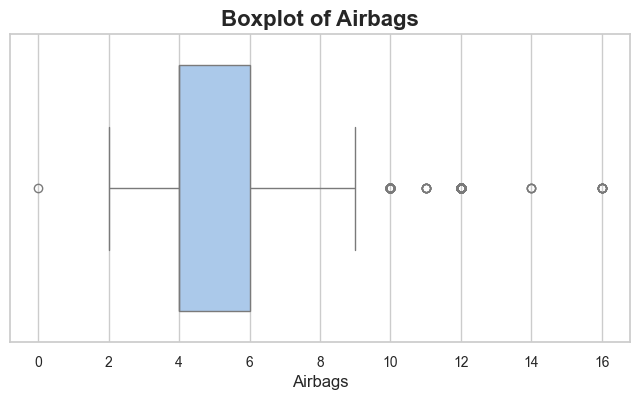

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette
palette = sns.color_palette("viridis", as_cmap=True)

# Histogram for numerical features
for feature in non_ob:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=30, color='dodgerblue', edgecolor='black')
    plt.title(f'Distribution of {feature}', fontsize=16, fontweight='bold')
    plt.xlabel(feature, fontsize=12, fontweight='bold')
    plt.ylabel('Frequency', fontsize=12, fontweight='bold')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

# Boxplot for numerical features with enhanced color
for feature in non_ob:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=feature, palette='pastel')
    plt.xticks(fontsize=10)  # Decrease font size of x-axis tick labels
    plt.yticks(fontsize=10)
    plt.title(f'Boxplot of {feature}', fontsize=16, fontweight='bold')
    plt.show()

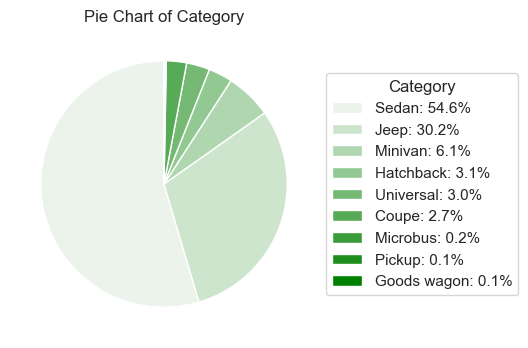

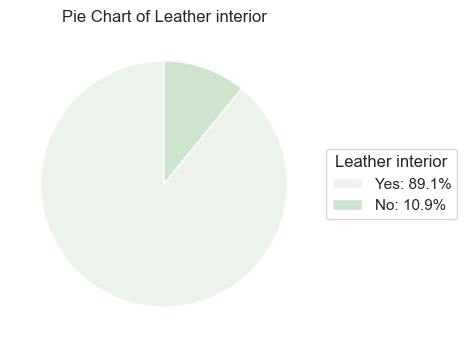

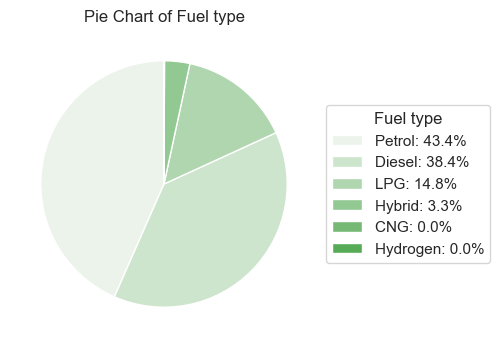

In [146]:
pie_charts = ['Category', 'Leather interior', 'Fuel type']

# Use Seaborn to generate a red color palette
palette = sns.light_palette("green", n_colors=9)  # Light red shades, adjust n_colors if necessary

# Plot the pie charts of all the features
for feature in pie_charts:
    plt.figure(figsize=(8, 4))

    # Get value counts and calculate percentages
    value_counts = df[feature].value_counts()
    percentages = value_counts / value_counts.sum() * 100

    # Plot the pie chart using Seaborn red color palette
    wedges, texts = plt.pie(value_counts, colors=palette[:len(value_counts)], startangle=90)

    # Create labels with the category names and percentages
    labels = [f'{label}: {percentage:.1f}%' for label, percentage in zip(value_counts.index, percentages)]

    # Add a legend to the side with percentages
    plt.legend(wedges, labels, title=feature, loc="center left", bbox_to_anchor=(1, 0.5))

    # Set the title of the chart
    plt.title(f'Pie Chart of {feature}')
    plt.show()

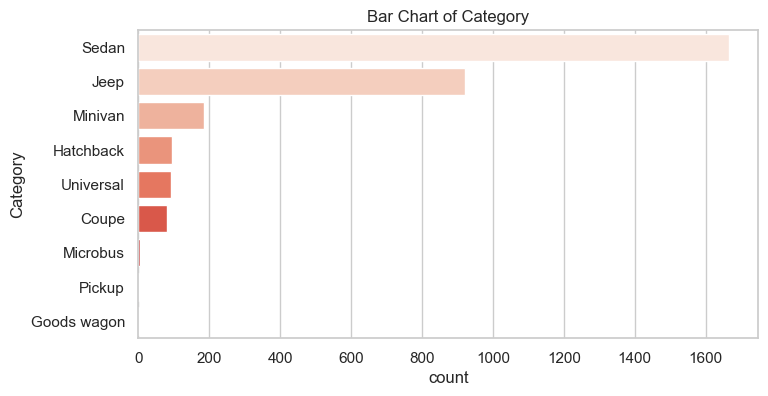

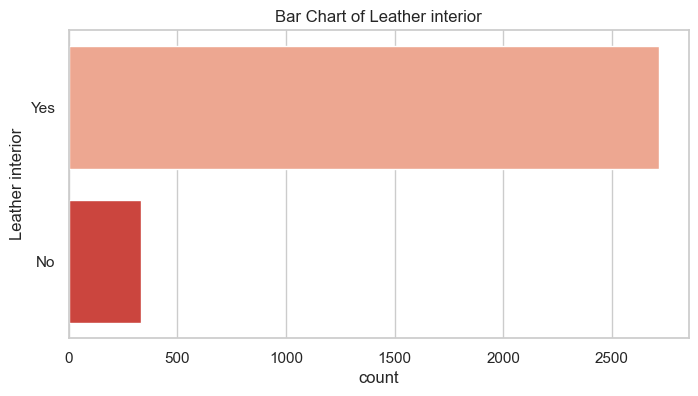

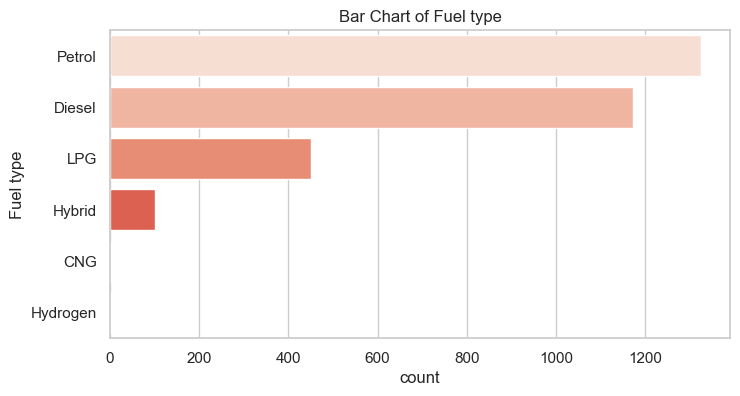

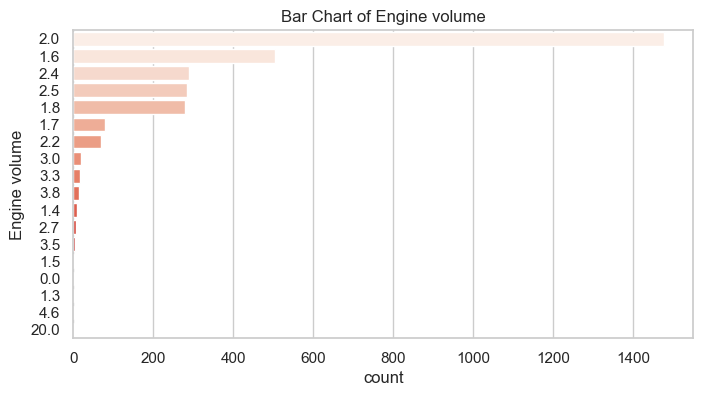

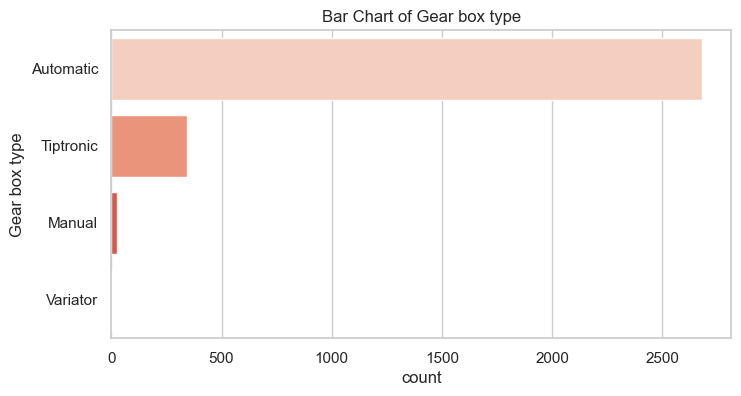

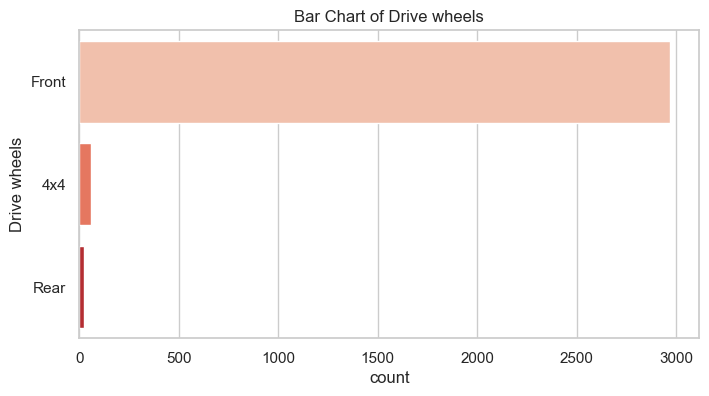

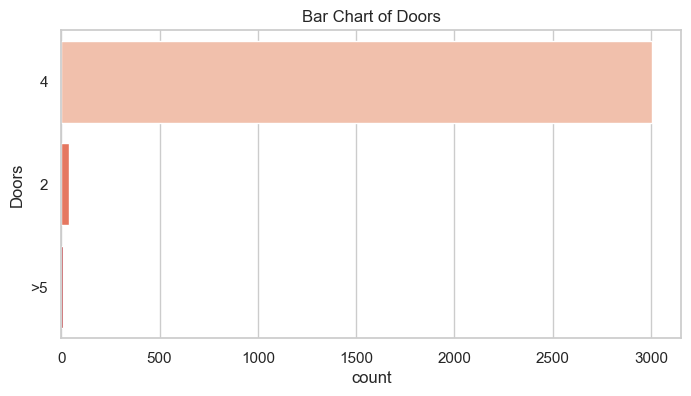

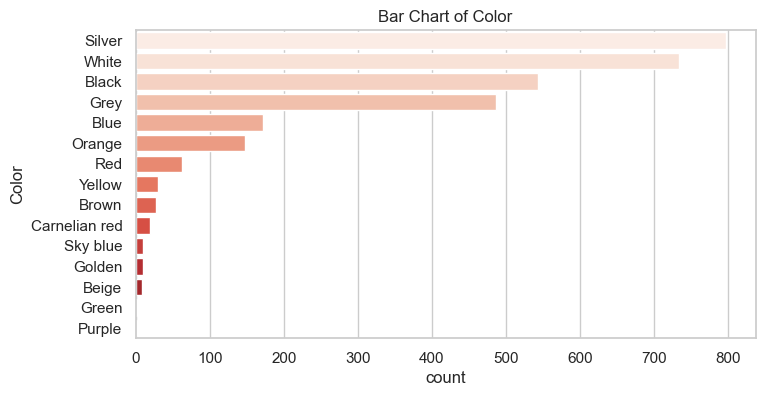

In [147]:
bar_charts = ['Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Gear box type', 'Drive wheels', 'Doors', 'Color']

for feature in bar_charts:
    plt.figure(figsize=(8, 4))

    # Plot the value counts as a bar chart using a Seaborn pink palette
    sns.countplot(y=feature, data=df, order=df[feature].value_counts().index, palette="Reds")

    plt.title(f'Bar Chart of {feature}')
    plt.show()

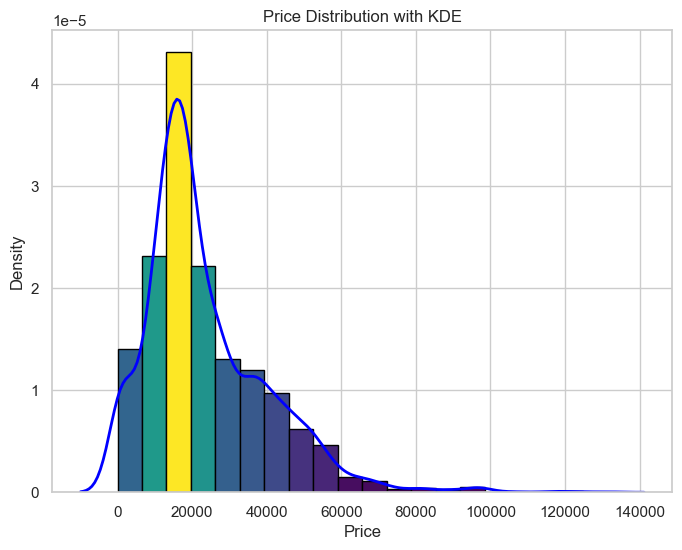

In [148]:
# Define a valid color map
colormap = plt.get_cmap('viridis')

# Compute density
hist_data, bin_edges = np.histogram(df['Price'], bins=20, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Normalize the density to range [0, 1] for color mapping
norm = plt.Normalize(hist_data.min(), hist_data.max())
colors = colormap(norm(hist_data))

# Plot histogram with color gradient
plt.figure(figsize=(8, 6))
bars = plt.bar(bin_centers, hist_data, width=bin_edges[1] - bin_edges[0], color=colors, edgecolor='black')

# Add KDE curve
sns.kdeplot(df['Price'], color='blue', linewidth=2)

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Price Distribution with KDE')

# Show plot
plt.show()

##  1. Price vs. Numeric Features

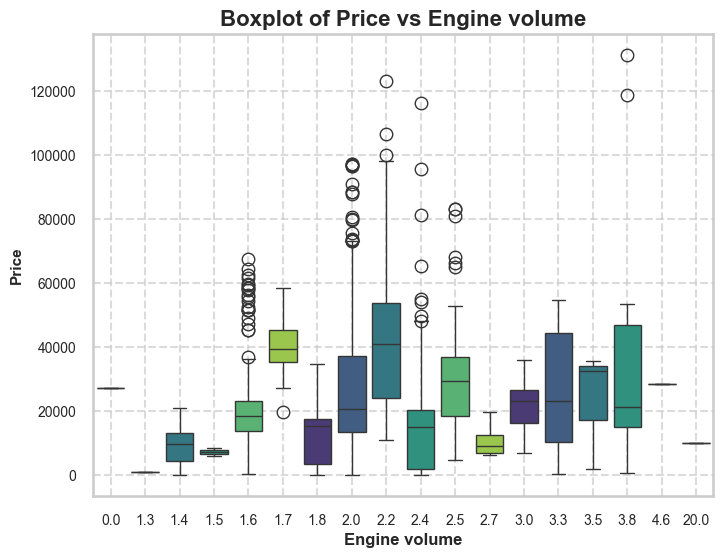

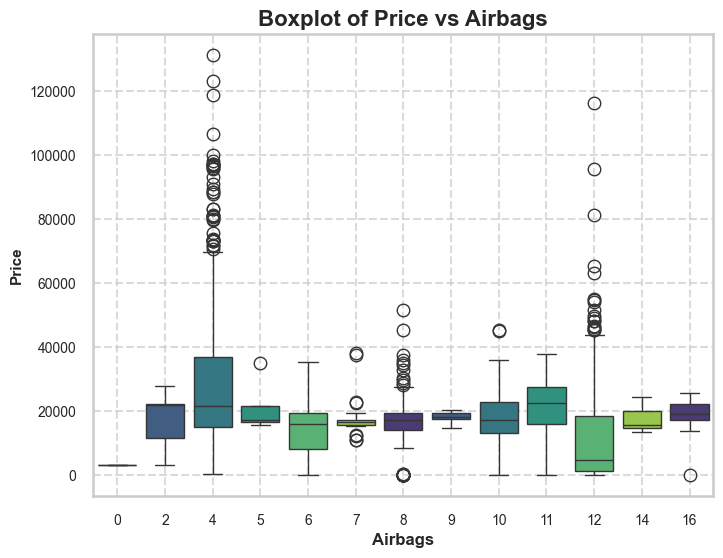

In [149]:
# Define a Seaborn color palette
palette_boxplot = sns.color_palette("viridis")  # Use 'viridis' palette

# Set Seaborn style and context
sns.set_style("whitegrid")  # Options: 'darkgrid', 'white', 'dark', 'whitegrid', 'ticks'
sns.set_context("talk")    # Options: 'paper', 'notebook', 'talk', 'poster'

# List of numeric features
numeric_features = ['Engine volume', 'Airbags']

# Create boxplots for each numeric feature
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=feature, y='Price', palette=palette_boxplot)
    plt.title(f'Boxplot of Price vs {feature}', fontsize=16, fontweight='bold')
    plt.xlabel(feature, fontsize=12, fontweight='bold')
    plt.ylabel('Price', fontsize=11, fontweight='bold')

    # Adjust tick label font size
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines for better readability
    plt.show()

## 2. Price vs. Categorical Features

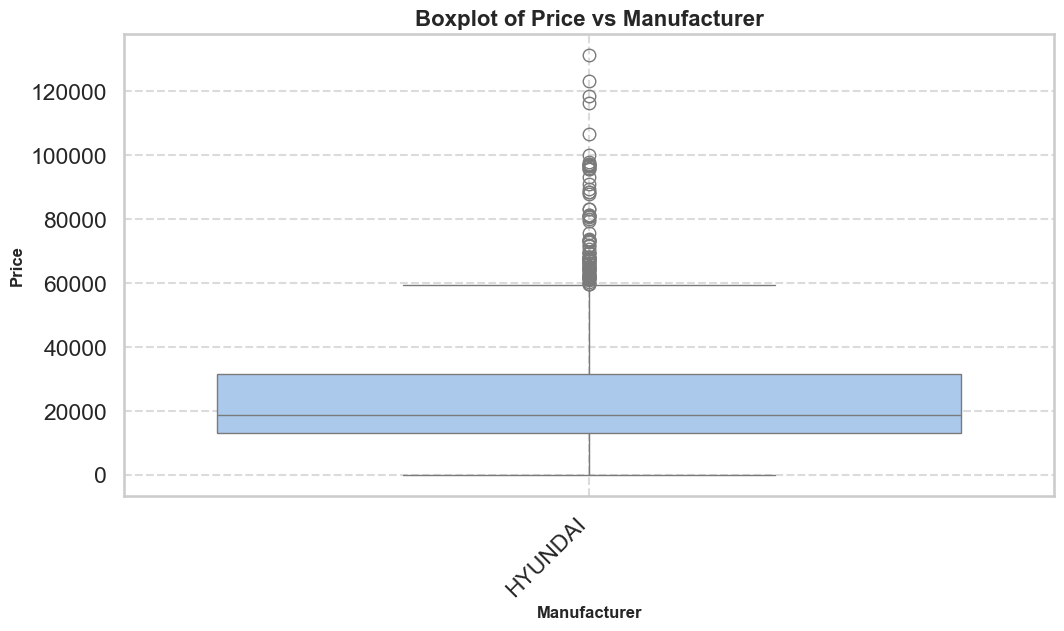

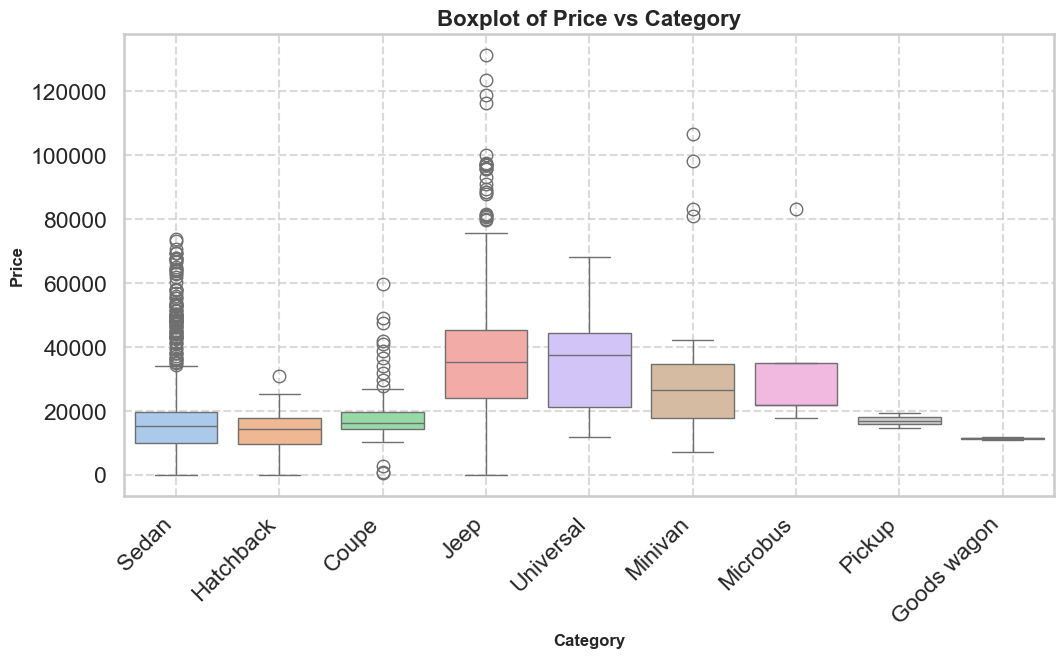

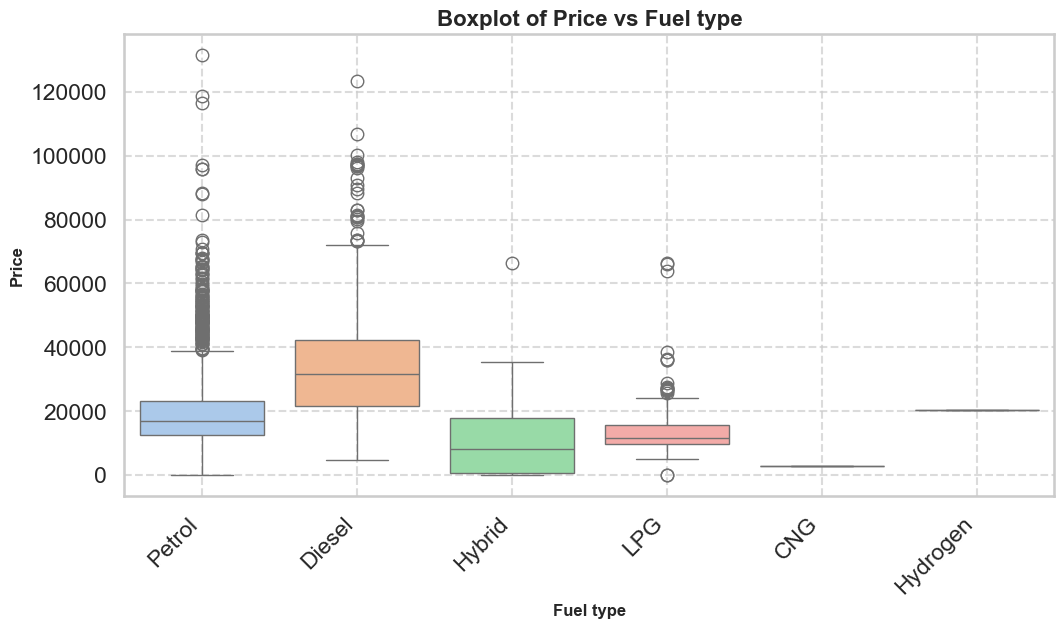

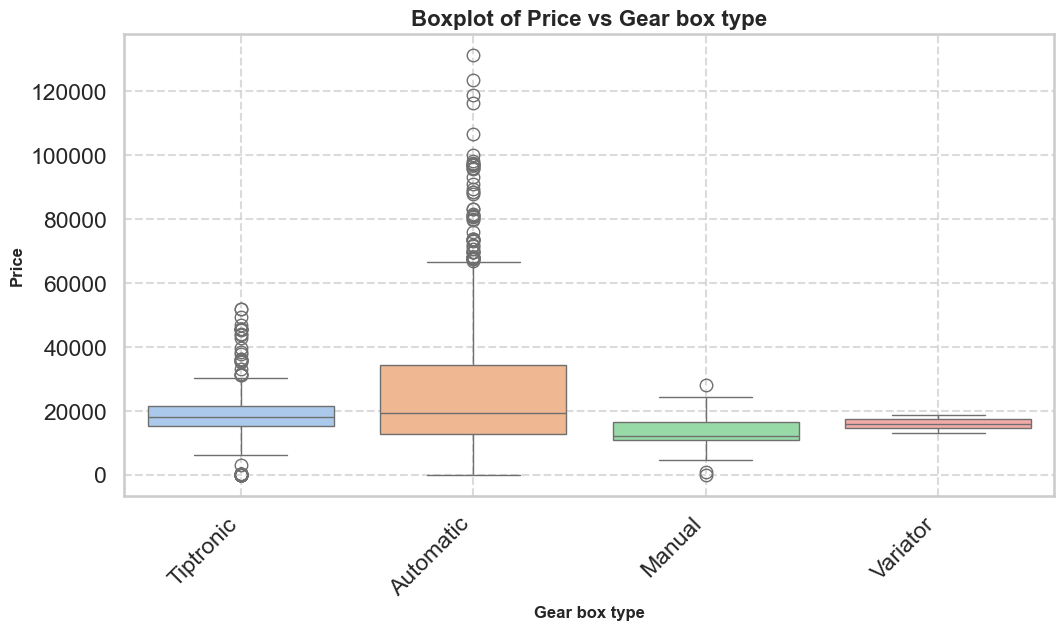

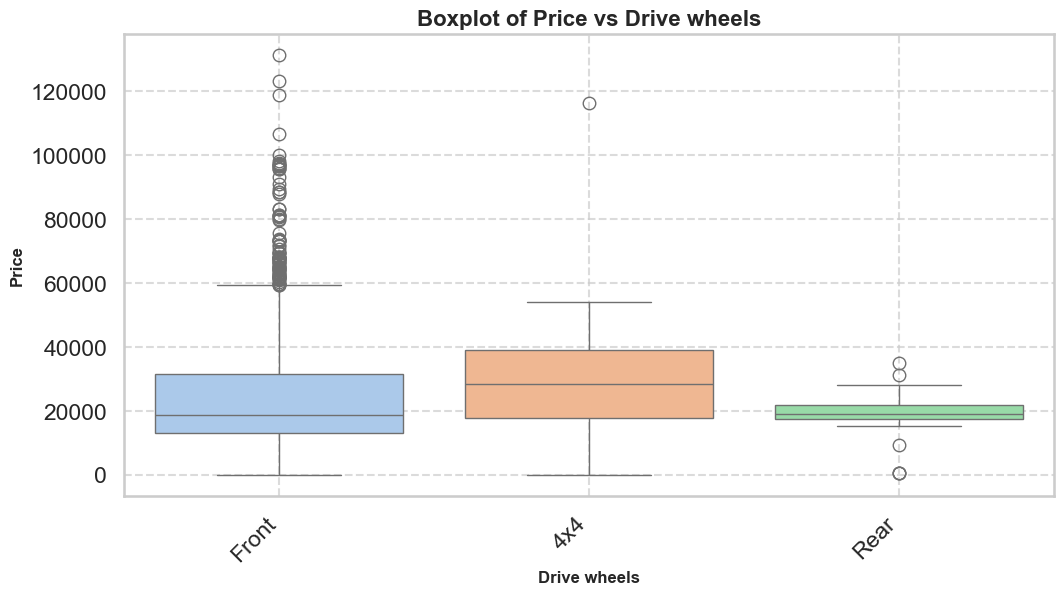

In [150]:
# Define a Seaborn color palette
palette = sns.color_palette("pastel")  # Use any Seaborn palette you like

# Set Seaborn style and context
sns.set_style("whitegrid")  # You can choose from 'darkgrid', 'white', 'dark', 'whitegrid', 'ticks'
sns.set_context("talk")    # You can choose from 'paper', 'notebook', 'talk', 'poster'

# List of categorical features
categorical_features = ['Manufacturer', 'Category', 'Fuel type', 'Gear box type', 'Drive wheels']

# Create boxplots for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=feature, y='Price', palette=palette)
    plt.title(f'Boxplot of Price vs {feature}', fontsize=16, fontweight='bold')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels and align them to the right
    plt.xlabel(feature, fontsize=12, fontweight='bold')  # Label x-axis with feature name
    plt.ylabel('Price', fontsize=12, fontweight='bold')  # Label y-axis

    # Add gridlines for better readability
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.show()

## 3. Pairwise Relationships

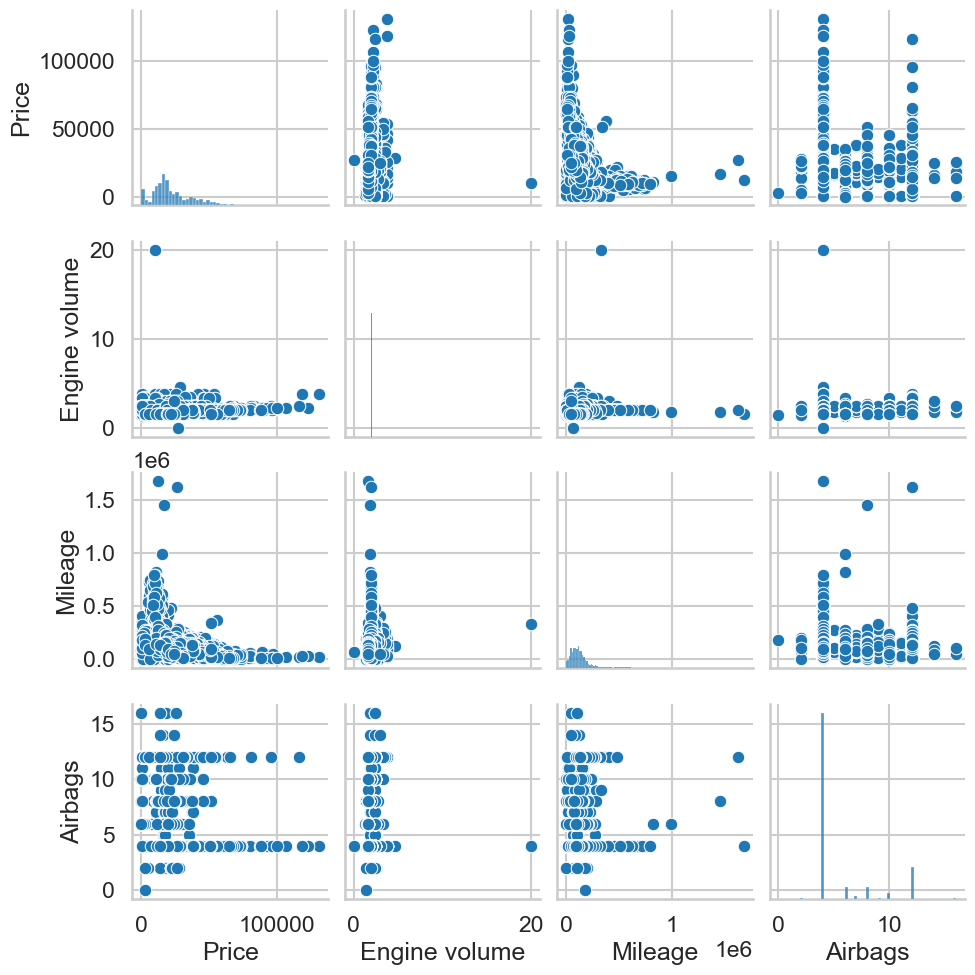

In [151]:
sns.pairplot(df[['Price', 'Engine volume', 'Mileage', 'Airbags']])
plt.show()

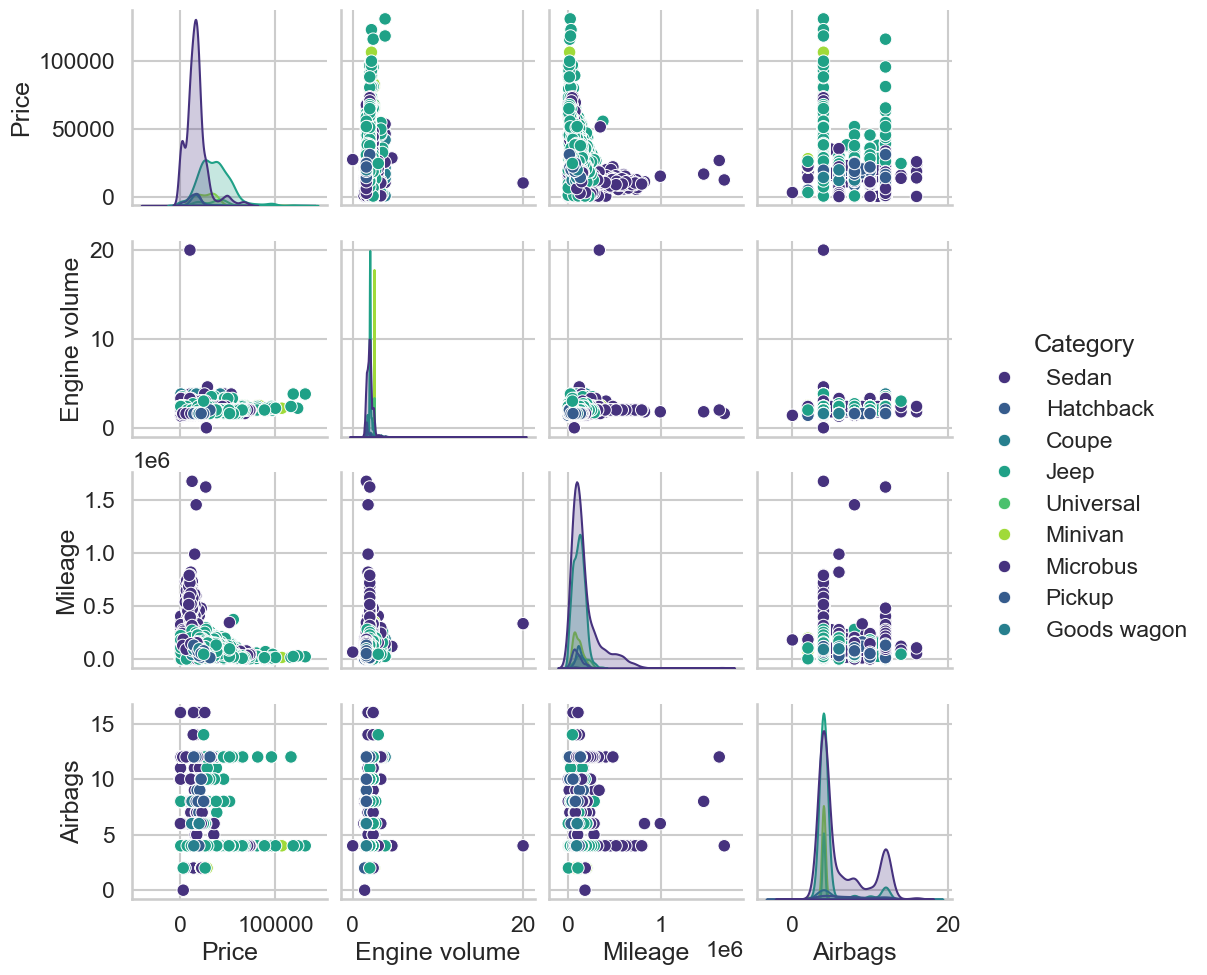

In [152]:
# Define a Seaborn color palette
palette = sns.color_palette("viridis")

# Pairplot with color palette
g = sns.pairplot(df[['Price', 'Engine volume', 'Mileage', 'Airbags', 'Category']], hue='Category', palette=palette)

plt.show()

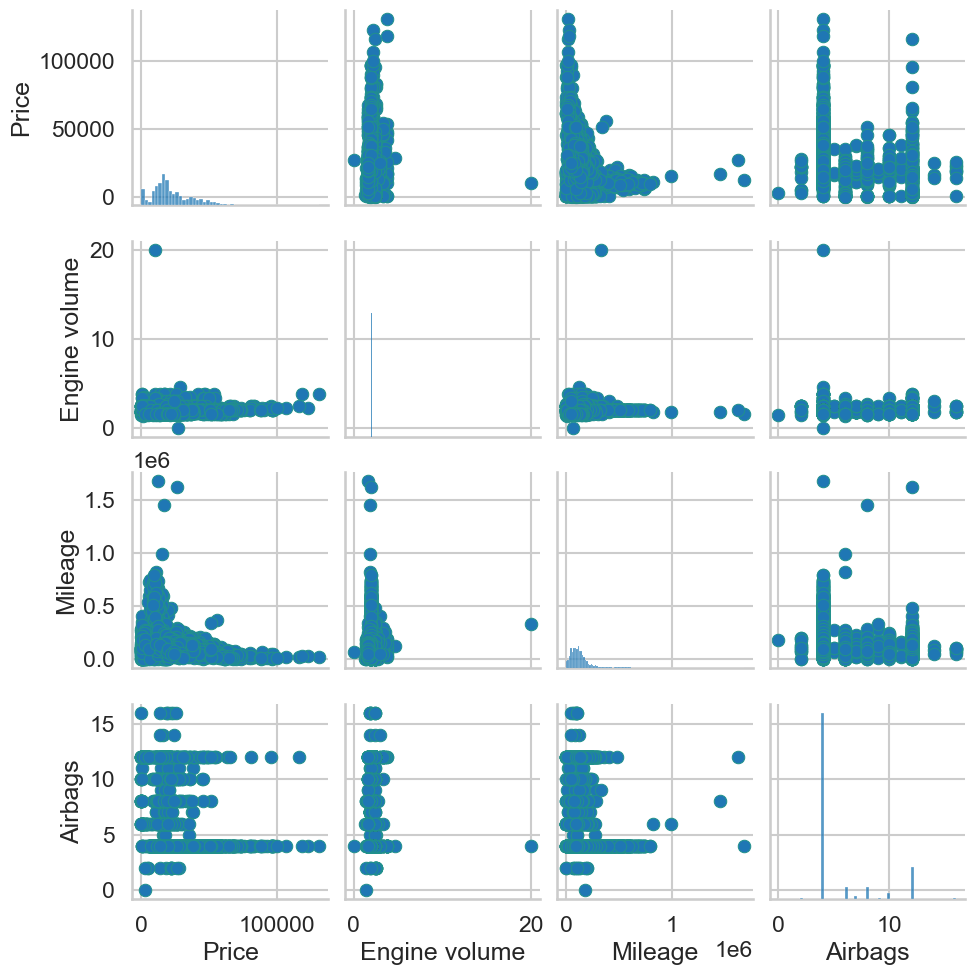

In [153]:
# Define a Seaborn color palette
palette = sns.color_palette("viridis", as_cmap=True)

# Create a pairplot
g = sns.pairplot(df[['Price', 'Engine volume', 'Mileage', 'Airbags']])

# Apply a color palette to scatter plots
for ax in g.axes.flatten():
    # Iterate over collections to apply color to scatter plot markers
    for collection in ax.collections:
        collection.set_edgecolor(palette(0.5))  # Modify as needed

plt.show()

## 4. Correlation Heatmap

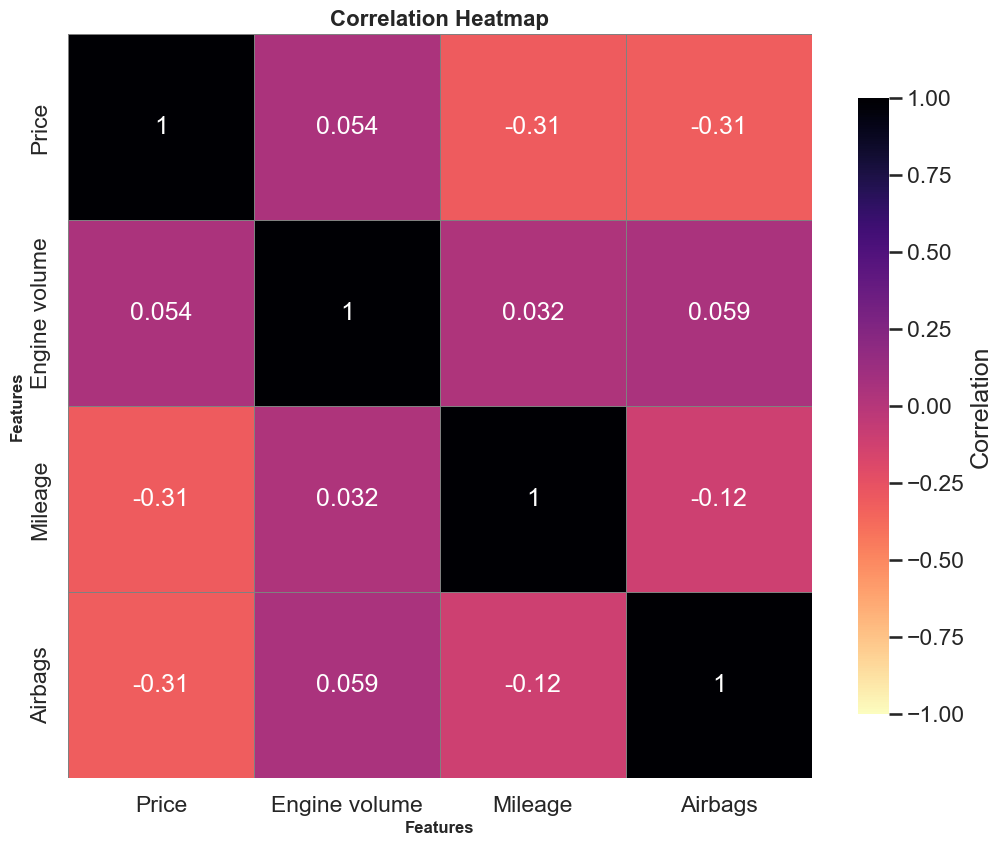

In [154]:
import matplotlib.colors as mcolors

# Define a Seaborn color palette and convert to colormap
cmap = sns.color_palette("magma", as_cmap=True)

# Reverse the colormap
cmap_reversed = mcolors.LinearSegmentedColormap.from_list(
    "reversed_magma", cmap(np.linspace(1, 0, cmap.N))
)

# Set Seaborn style and context
sns.set_style("whitegrid")  # You can choose from 'darkgrid', 'white', 'dark', 'whitegrid', 'ticks'
sns.set_context("talk")    # You can choose from 'paper', 'notebook', 'talk', 'poster'

# Compute correlation matrix
plt.figure(figsize=(12, 10))  # Increase figure size for better readability
corr_matrix = df[['Price', 'Engine volume', 'Mileage', 'Airbags']].corr()

# Plot the heatmap with the reversed colormap
ax = sns.heatmap(
    corr_matrix,
    annot=True,
    cmap=cmap_reversed,
    vmin=-1,
    vmax=1,
    center=0,
    linewidths=0.5,
    linecolor='gray',
    square=True,  # Ensure the heatmap is square
    cbar_kws={'shrink': 0.8, 'label': 'Correlation'}  # Customize colorbar
)

# Enhance the plot with additional aesthetics
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')

# Add gridlines with a specific style
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

## For floats and int values

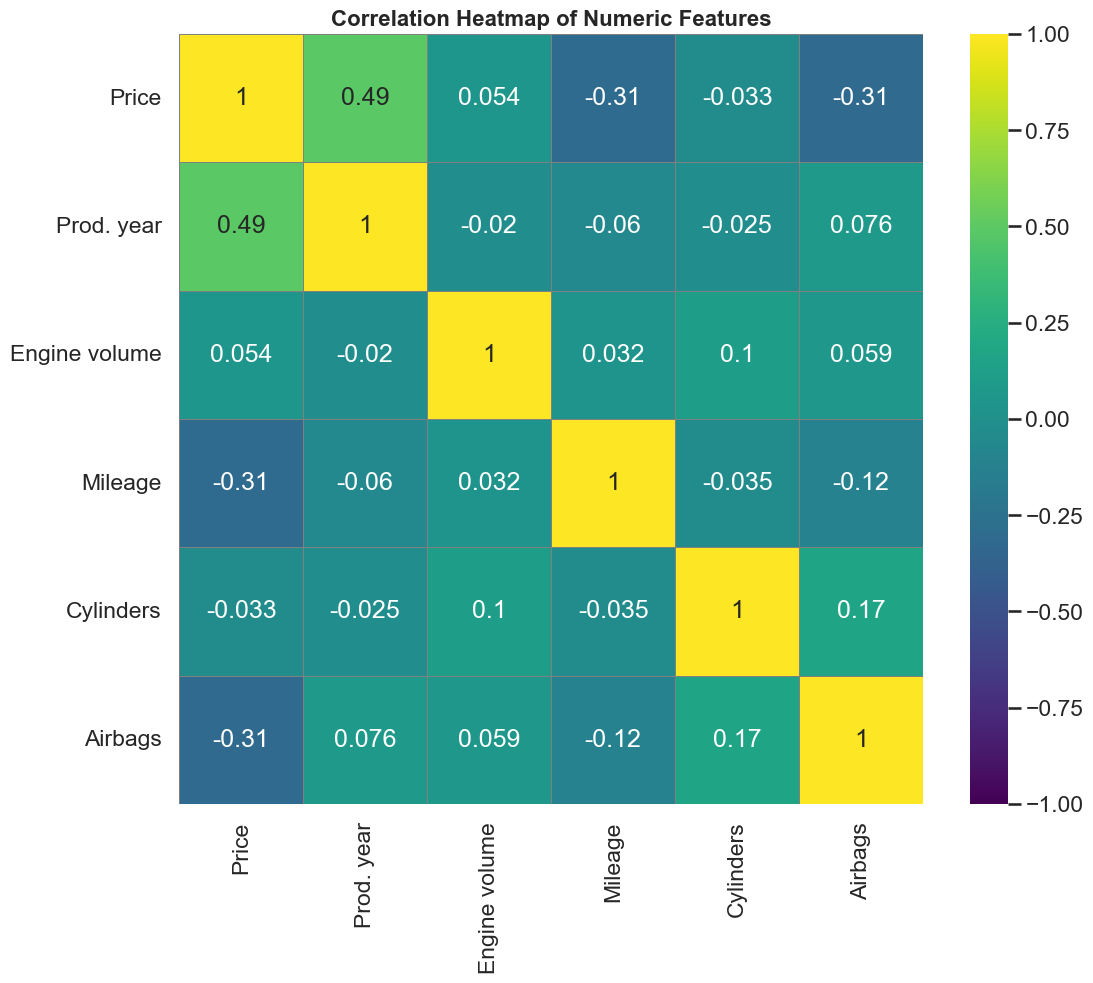

In [155]:
# Filter numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1, center=0, linewidths=0.5, linecolor='gray')
plt.title('Correlation Heatmap of Numeric Features', fontsize=16, fontweight='bold')
plt.show()

## 5. Categorical Feature Counts

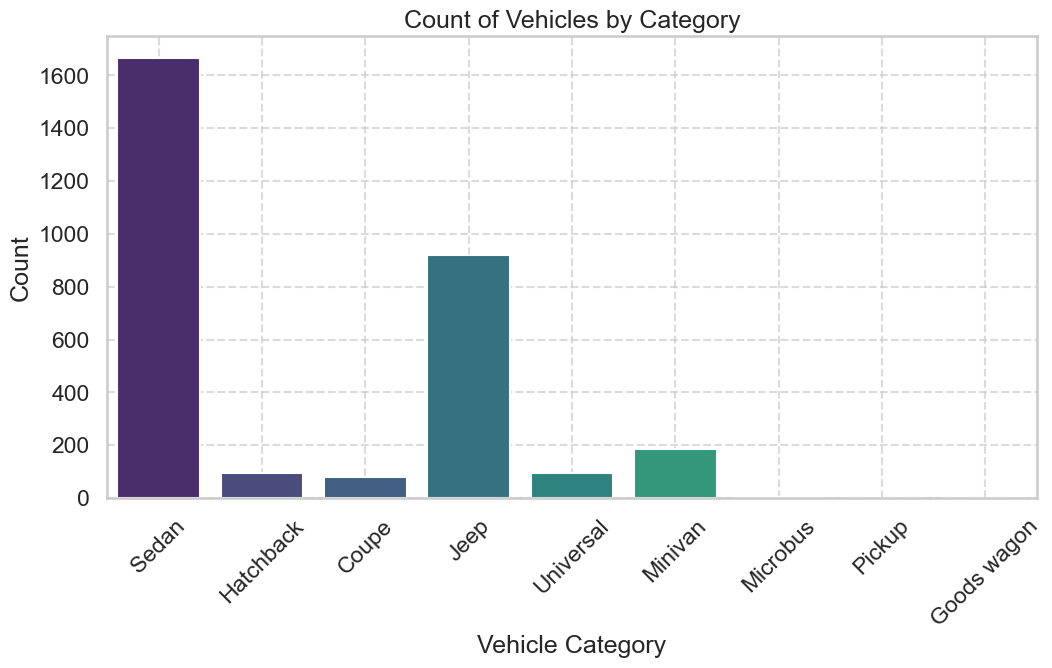

In [156]:
# Set Seaborn style and context
sns.set_style("whitegrid")  # You can choose from 'darkgrid', 'white', 'dark', 'whitegrid', 'ticks'
sns.set_context("talk")    # You can choose from 'paper', 'notebook', 'talk', 'poster'

# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Category', palette='viridis')  # Apply a color palette
plt.title('Count of Vehicles by Category')  # Updated title to reflect 'Category'
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Vehicle Category')  # Label for x-axis
plt.ylabel('Count')  # Label for y-axis

# Enhance the plot with additional aesthetics
plt.grid(True, linestyle='--', alpha=0.7)  # Add a grid with dashed lines

plt.show()

## 6. Feature Interactions

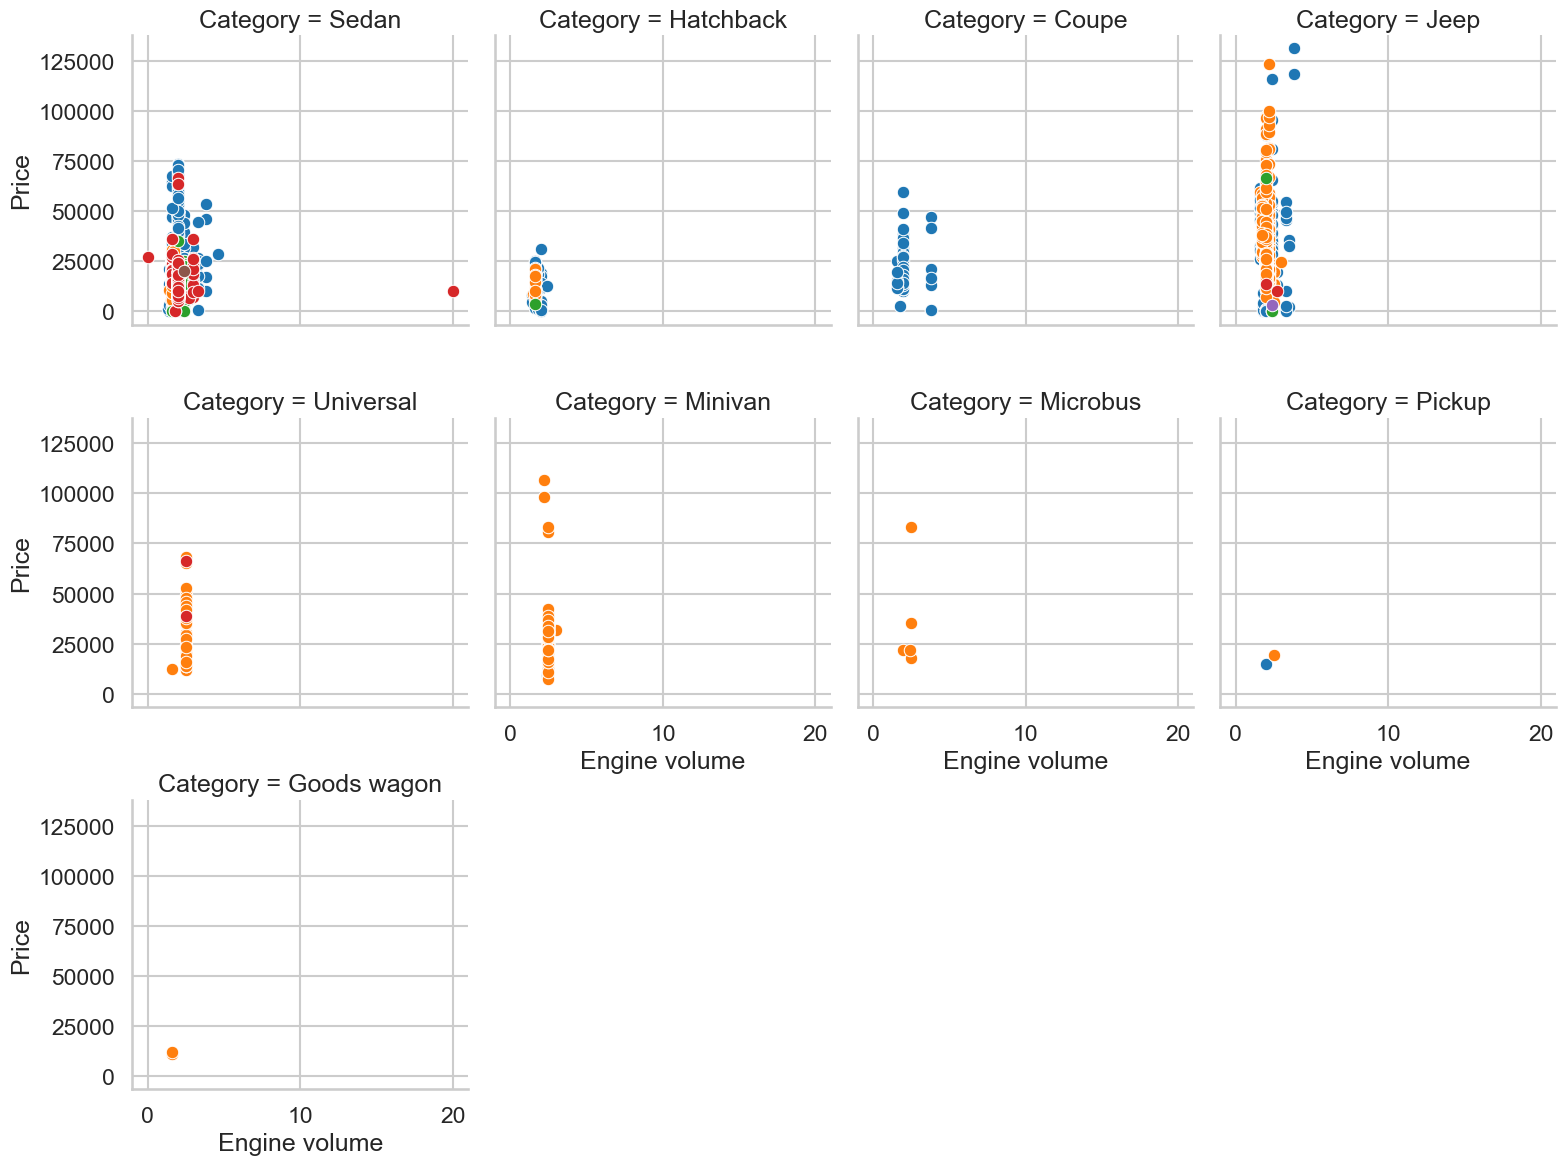

In [157]:
g = sns.FacetGrid(df, col='Category', hue='Fuel type', col_wrap=4, height=4)
g.map(sns.scatterplot, 'Engine volume', 'Price')
plt.show()

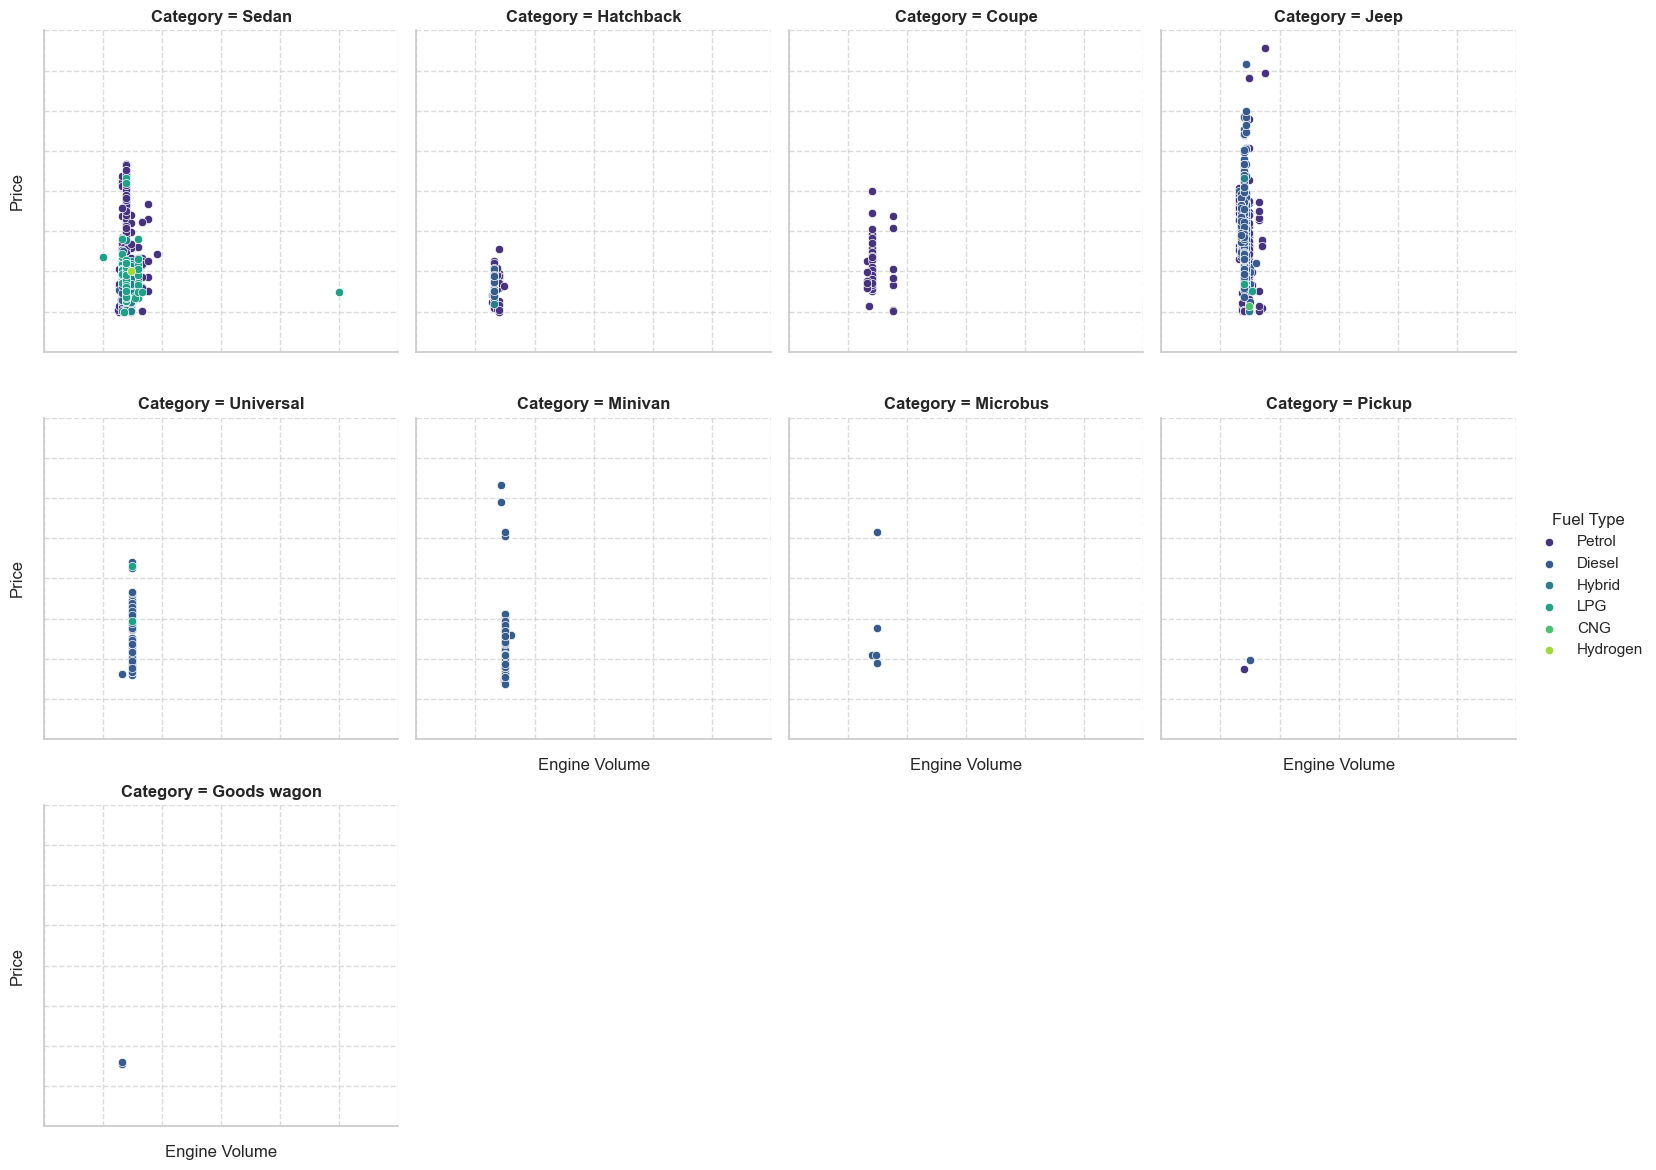

In [158]:
# Set Seaborn style and context
sns.set_style("whitegrid")  # Options: 'darkgrid', 'white', 'dark', 'whitegrid', 'ticks'
sns.set_context("notebook")  # Options: 'paper', 'notebook', 'talk', 'poster'

# Create FacetGrid for scatter plots
g = sns.FacetGrid(df, col='Category', hue='Fuel type', col_wrap=4, height=4, palette='viridis')
g.map(sns.scatterplot, 'Engine volume', 'Price')

# Enhance plot with titles, labels, and legend
g.set_axis_labels('Engine Volume', 'Price')
g.set_titles(col_template='{col_name}')
g.add_legend(title='Fuel Type')

# Adjust font sizes
g.set_titles(fontsize=14, fontweight='bold')
g.set_axis_labels(fontsize=12, fontweight='bold')
g.set_xticklabels(fontsize=10)
g.set_yticklabels(fontsize=10)

# Add gridlines for better readability
for ax in g.axes.flat:
    ax.grid(True, linestyle='--', alpha=0.7)

plt.show()


In [159]:
# Check for unique values in 'Cylinders'
print(df['Cylinders'].value_counts())

Cylinders
4     2987
6       54
8        3
1        2
2        2
16       1
10       1
Name: count, dtype: int64


## Encoding

In [160]:
from sklearn.preprocessing import LabelEncoder

In [161]:
encoder = LabelEncoder()

In [162]:
# Encode the categorical features that include in df
for feature in obj:
    df[feature] = encoder.fit_transform(df[feature])

In [163]:
df.head()

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
1065,21326.0,0,0,2016,7,0,5,4,785,4,2,1,1,0,13,6
1066,9408.0,0,0,2012,2,1,1,4,525,4,0,1,1,0,13,4
1067,17249.0,0,0,2015,7,0,5,4,1608,4,0,1,2,0,7,6
1068,13877.0,0,0,2012,7,1,1,4,2099,4,0,1,1,0,7,4
1069,14113.0,0,0,2013,2,0,5,4,1513,4,2,1,1,0,13,6


In [164]:
df.dtypes

Price               float64
Manufacturer          int64
Model                 int64
Prod. year            int64
Category              int64
Leather interior      int64
Fuel type             int64
Engine volume         int64
Mileage               int64
Cylinders             int64
Gear box type         int64
Drive wheels          int64
Doors                 int64
Wheel                 int64
Color                 int64
Airbags               int64
dtype: object

## 1. Split data into training and testing sets

In [165]:
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [166]:
# Split data into training and testing sets
X = df.drop('Price', axis=1)
y = df['Price']

In [167]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [168]:
X

,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
1065,0,0,2016,7,0,5,4,785,4,2,1,1,0,13,6
1066,0,0,2012,2,1,1,4,525,4,0,1,1,0,13,4
1067,0,0,2015,7,0,5,4,1608,4,0,1,2,0,7,6
1068,0,0,2012,7,1,1,4,2099,4,0,1,1,0,7,4
1069,0,0,2013,2,0,5,4,1513,4,2,1,1,0,13,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18152,0,27,2013,2,0,5,4,657,4,2,1,1,0,14,8
18153,0,27,2014,0,1,5,4,988,4,1,1,0,0,1,6
18154,0,28,2016,2,1,5,4,743,4,1,1,0,0,5,8
18155,0,28,2014,2,1,5,4,391,4,1,1,1,0,13,10


In [169]:
y

1065     21326.0
1066      9408.0
1067     17249.0
1068     13877.0
1069     14113.0
          ...   
18152    18660.0
18153    19757.0
18154    24462.0
18155    21856.0
18177    24462.0
Name: Price, Length: 3050, dtype: float64

## Feature Scaling

In [170]:
import pickle
from sklearn.preprocessing import StandardScaler

# Standardize the dataset (This can help for models like GradientBoosting)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [171]:
# Save the fittest scaler to a file using pickle
scaler_filename = "scaler.pkl"

with open(scaler_filename, 'wb') as scaler_filename:
    pickle.dump(scaler, scaler_filename)

# Train the Models

In [172]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

## 1. LR

In [173]:
from sklearn.linear_model import LinearRegression

In [174]:
model_LR = LinearRegression()

# Define hyperparameters for Linear Regression
param_LR = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# Perform GridSearchCV
grid_search_LR = GridSearchCV(model_LR, param_LR, cv=5, n_jobs=-1, verbose=1)
grid_search_LR.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print(f'Best parameters for LinearRegression: {grid_search_LR.best_params_}')

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for LinearRegression: {'copy_X': True, 'fit_intercept': True}


In [175]:
y_pred_LR = grid_search_LR.predict(X_test_scaled)

mse_LR = mean_squared_error(y_test, y_pred_LR)
mae_LR = mean_absolute_error(y_test, y_pred_LR)
r2_LR = r2_score(y_test, y_pred_LR)

print(f'MSE: {mse_LR}')
print(f'MAE: {mae_LR}')
print(f'R2: {r2_LR}')

MSE: 111827155.21131994
MAE: 8227.483546531701
R2: 0.5623589879066903


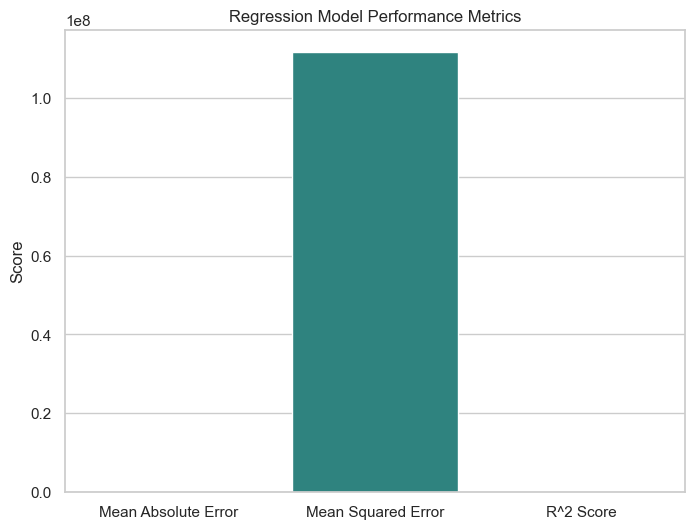

In [176]:
# Plot performance metrics
plt.figure(figsize=(8, 6))
metrics = {'Mean Absolute Error': mae_LR, 'Mean Squared Error': mse_LR, 'R^2 Score': r2_LR}
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')
plt.ylabel('Score')
plt.title('Regression Model Performance Metrics')
plt.show()

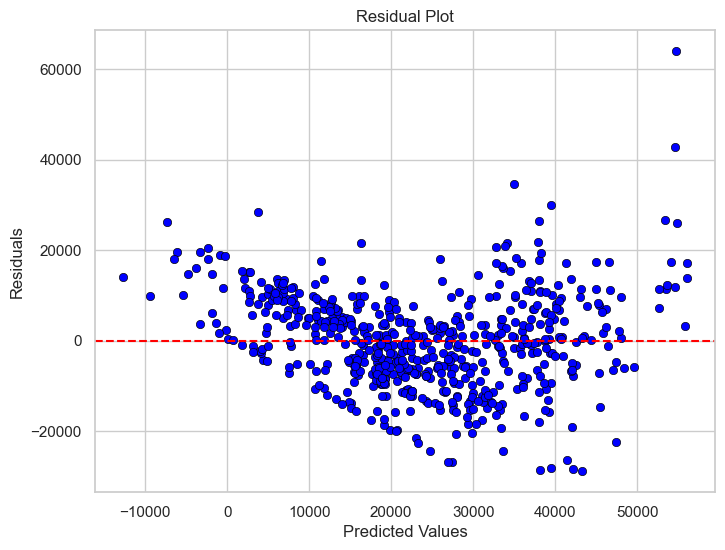

In [177]:
# Calculate residuals
residuals = y_test - y_pred_LR

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_LR, y=residuals, color='blue', edgecolor='black')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

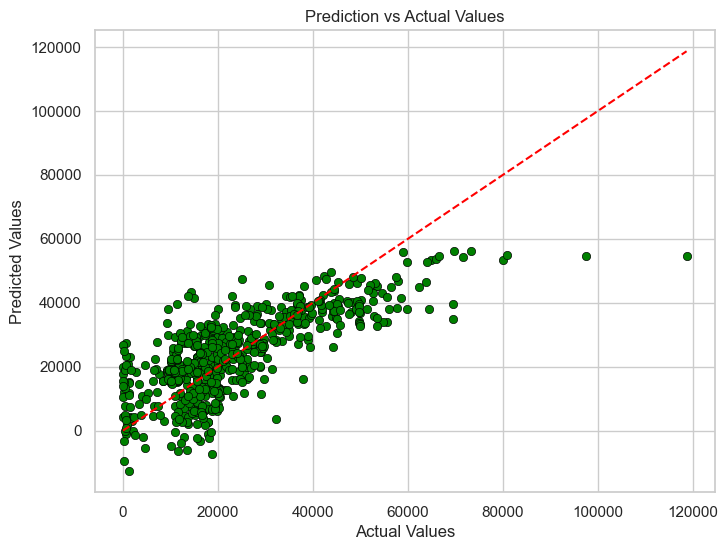

In [178]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_LR, color='green', edgecolor='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction vs Actual Values')
plt.show()

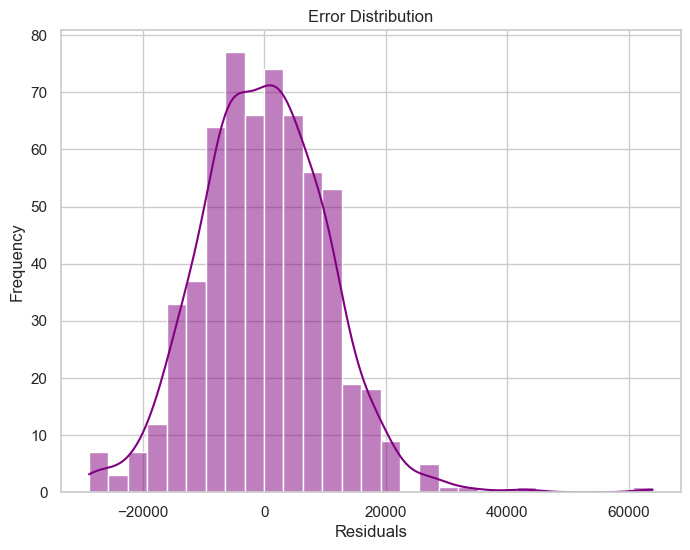

In [179]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Error Distribution')
plt.show()

## 02. Random Forest Regression

In [180]:
from sklearn.ensemble import RandomForestRegressor

In [181]:
# Creat a RandomForestRegression object
rf_model = RandomForestRegressor()


# Define hyperparameters for RandomForestRegressor
rf_params_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Perform GridSearch for RandomForestRegressor
rf_grid = GridSearchCV(RandomForestRegressor(), rf_params_rf, cv=5, scoring='r2', n_jobs=-1, verbose=2)
rf_grid.fit(X_train_scaled, y_train)

# Best parameters for RandomForestRegressor
print(f"Best Parameters for RandomForest: {rf_grid.best_params_}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters for RandomForest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [182]:
y_pred_rf = rf_grid.predict(X_test_scaled)

# MSE and R2 calculating
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f'MSE: {mse_rf}')
print(f'MAE: {mae_rf}')
print(f'R2: {r2_rf}')

MSE: 50469095.01438983
MAE: 4249.4395379896705
R2: 0.8024867414377798


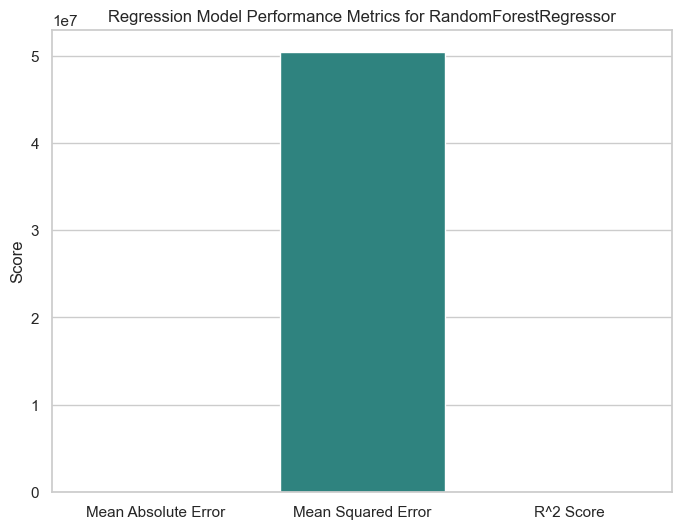

In [183]:
# Plot performance metrics
plt.figure(figsize=(8, 6))
metrics_rf = {'Mean Absolute Error': mae_rf, 'Mean Squared Error': mse_rf, 'R^2 Score': r2_rf}
sns.barplot(x=list(metrics_rf.keys()), y=list(metrics_rf.values()), palette='viridis')
plt.ylabel('Score')
plt.title('Regression Model Performance Metrics for RandomForestRegressor')
plt.show()

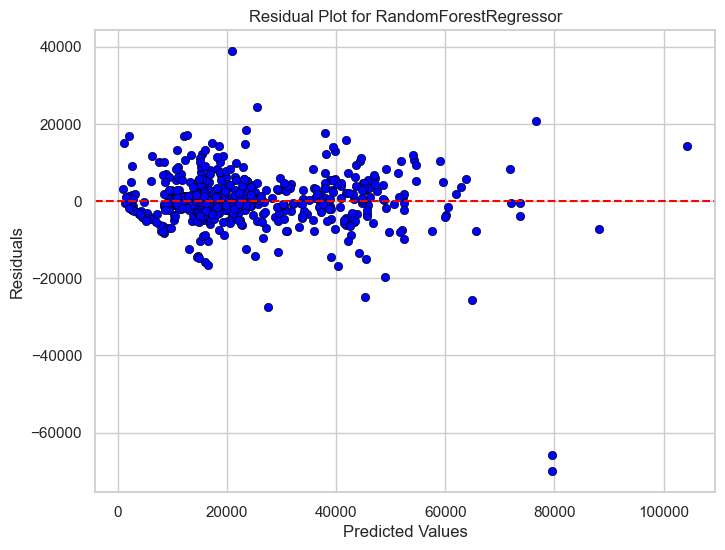

In [184]:
# Calculate residuals
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_rf, y=residuals_rf, color='blue', edgecolor='black')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for RandomForestRegressor')
plt.show()

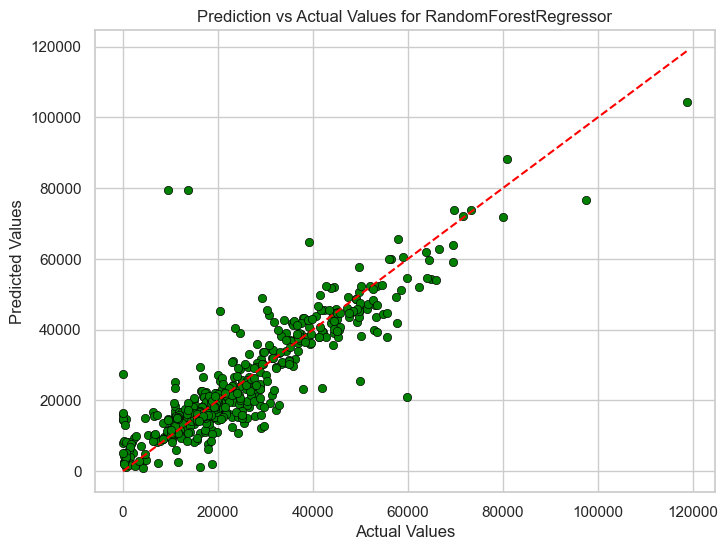

In [185]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='green', edgecolor='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction vs Actual Values for RandomForestRegressor')
plt.show()

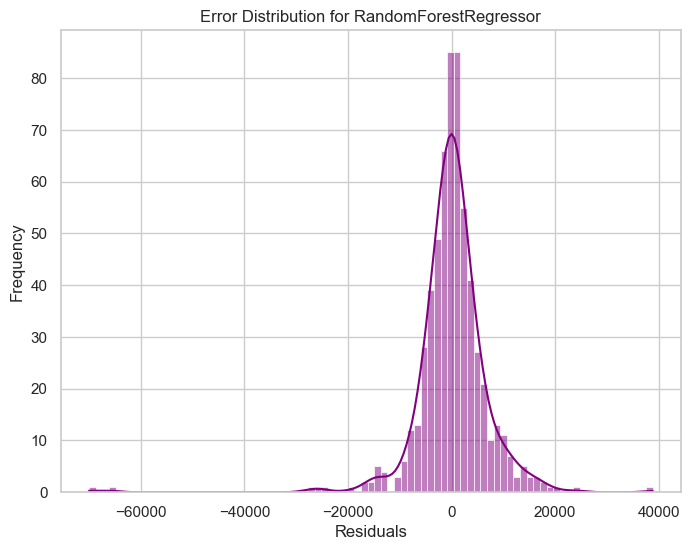

In [186]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals_rf, kde=True, color='purple')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Error Distribution for RandomForestRegressor')
plt.show()

## 03. SVR

In [187]:
from sklearn.svm import SVR

In [188]:
# Create a SVR object
svr_model = SVR()

# Define yperparameters for SVR
param_svr = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.2]
}

# Perform GridSearch for SVR
svr_grid = GridSearchCV(svr_model, param_svr, cv=5, scoring='r2', n_jobs=-1, verbose=2)
svr_grid.fit(X_train_scaled, y_train)

print(f"Best Parameters for SVR: {svr_grid.best_params_}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters for SVR: {'C': 10, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'linear'}


In [189]:
y_pred_svr = svr_grid.predict(X_test_scaled)

# MSE and R2 calculating
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'MSE: {mse_svr}')
print(f'MAE: {mae_svr}')
print(f'R2: {r2_svr}')

MSE: 135258985.3852029
MAE: 8436.5078062972
R2: 0.47065738060819173


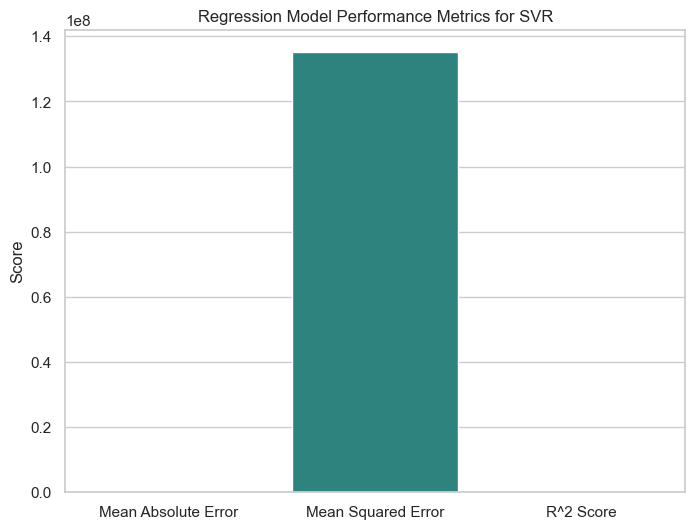

In [190]:
# Plot performance metrics
plt.figure(figsize=(8, 6))
metrics_svr = {'Mean Absolute Error': mae_svr, 'Mean Squared Error': mse_svr, 'R^2 Score': r2_svr}
sns.barplot(x=list(metrics_svr.keys()), y=list(metrics_svr.values()), palette='viridis')
plt.ylabel('Score')
plt.title('Regression Model Performance Metrics for SVR')
plt.show()

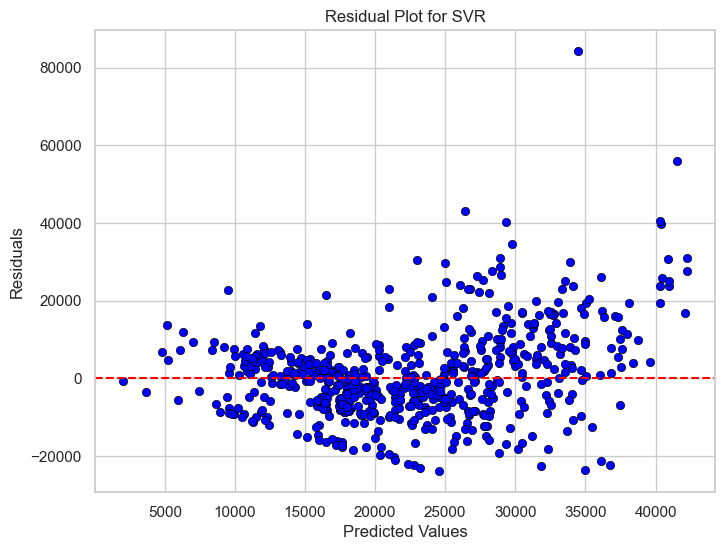

In [191]:
# Calculate residuals
residuals_svr = y_test - y_pred_svr

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_svr, y=residuals_svr, color='blue', edgecolor='black')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for SVR')
plt.show()

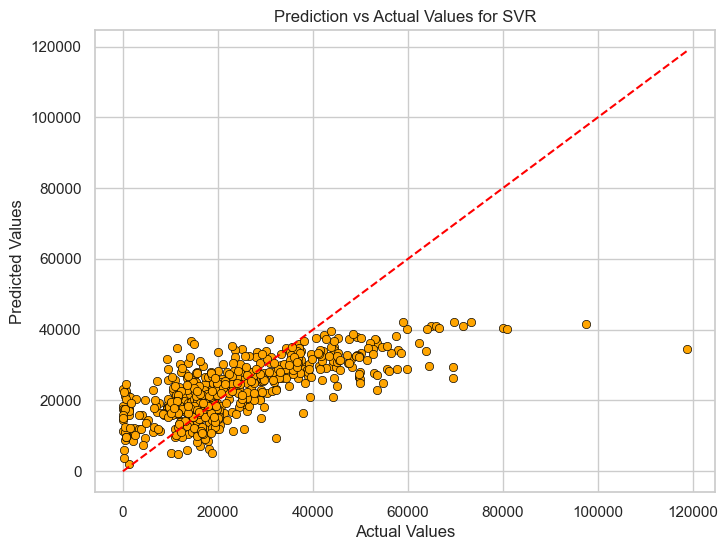

In [192]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_svr, color='orange', edgecolor='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction vs Actual Values for SVR')
plt.show()

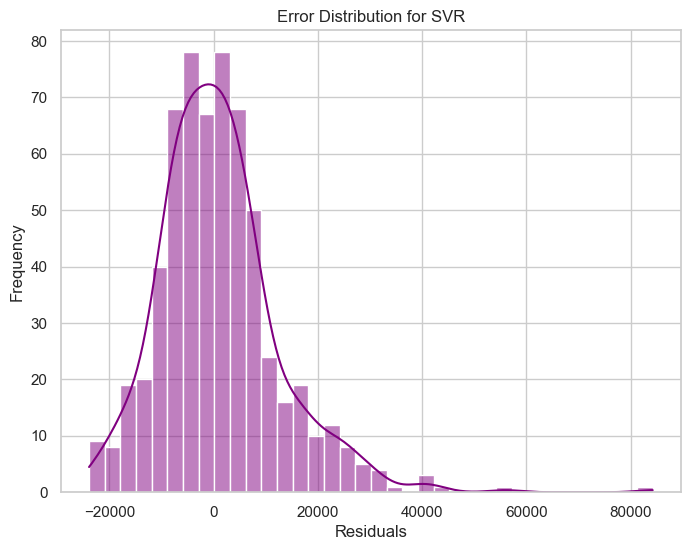

In [193]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals_svr, kde=True, color='purple')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Error Distribution for SVR')
plt.show()

## 04. Gradient boosting

In [194]:
from sklearn.ensemble import GradientBoostingRegressor

In [195]:
# Create a GradientBoostingRegressor object
gb_model = GradientBoostingRegressor()

# Define hyperparameters for GradientBoostingRegressor
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Perform GridSearch for GradientBoostingRegressor
gb_grid = GridSearchCV(gb_model, gb_params, cv=5, scoring='r2', n_jobs=-1, verbose=2)
gb_grid.fit(X_train_scaled, y_train)

# Best parameters for GradientBoostingRegressor
print(f"Best GradientBoosting Parameters: {gb_grid.best_params_}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best GradientBoosting Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [196]:
y_pred_gb = gb_grid.best_estimator_.predict(X_test_scaled)

# MSE and R2 calculating
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'MSE: {mse_gb}')
print(f'MAE: {mae_gb}')
print(f'R2: {r2_gb}')

MSE: 60920120.881347455
MAE: 4542.70488140212
R2: 0.76158614328534


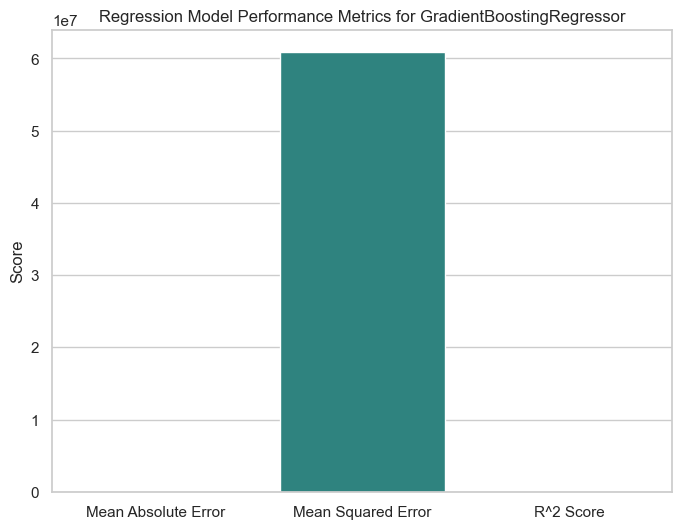

In [197]:
# Plot performance metrics
plt.figure(figsize=(8, 6))
metrics_gb = {'Mean Absolute Error': mae_gb, 'Mean Squared Error': mse_gb, 'R^2 Score': r2_gb}
sns.barplot(x=list(metrics_gb.keys()), y=list(metrics_gb.values()), palette='viridis')
plt.ylabel('Score')
plt.title('Regression Model Performance Metrics for GradientBoostingRegressor')
plt.show()

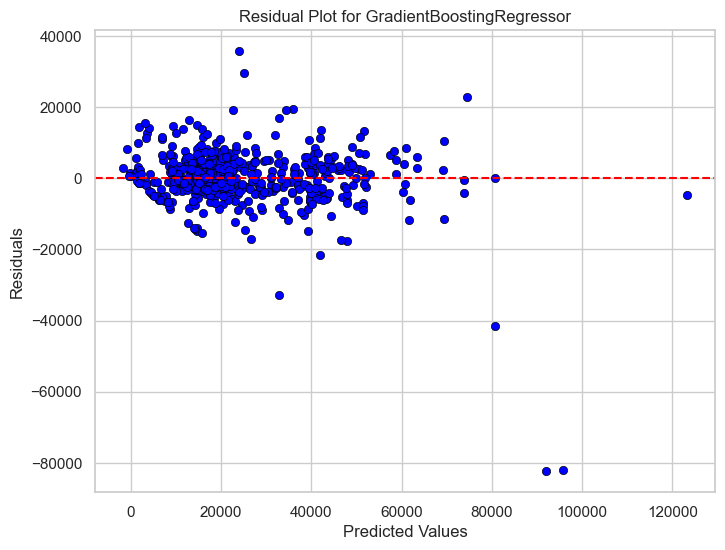

In [198]:
# Calculate residuals
residuals_gb = y_test - y_pred_gb

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_gb, y=residuals_gb, color='blue', edgecolor='black')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for GradientBoostingRegressor')
plt.show()

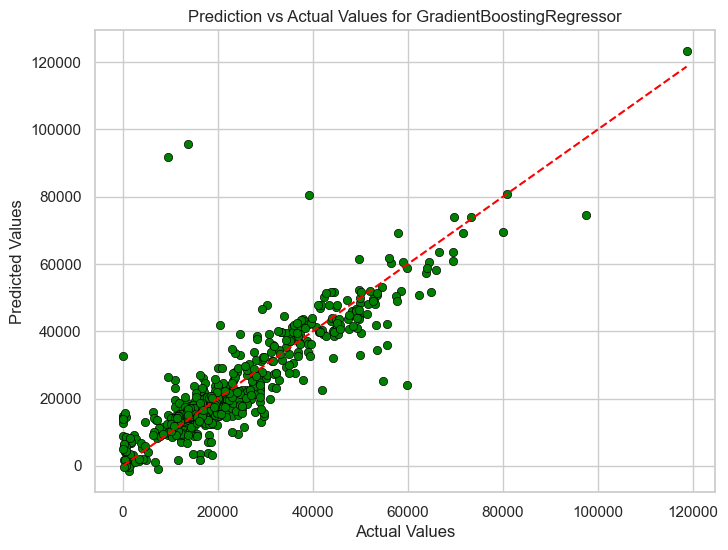

In [199]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_gb, color='green', edgecolor='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction vs Actual Values for GradientBoostingRegressor')
plt.show()

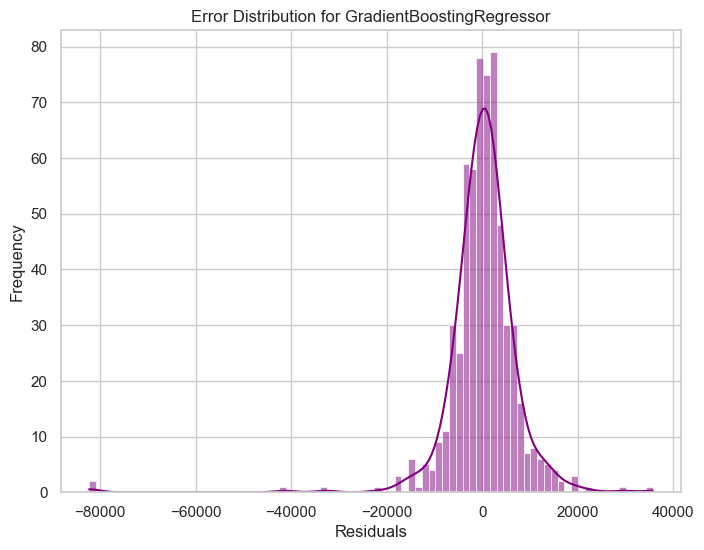

In [200]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals_gb, kde=True, color='purple')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Error Distribution for GradientBoostingRegressor')
plt.show()

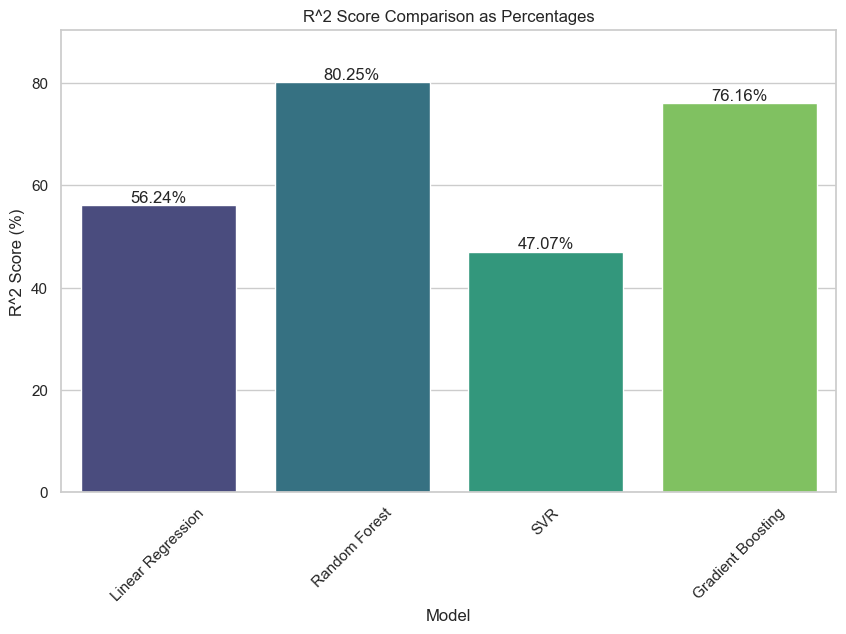

In [201]:
# Define models and their names
models = ['Linear Regression', 'Random Forest', 'SVR', 'Gradient Boosting']
y_preds = [y_pred_LR, y_pred_rf, y_pred_svr, y_pred_gb]

# Calculate R² values and convert to percentages
r2_values = [r2_score(y_test, y_pred) * 100 for y_pred in y_preds]

# Create a DataFrame for easy plotting
metrics_df = pd.DataFrame({
    'Model': models,
    'R^2 Score (%)': r2_values
})

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='R^2 Score (%)', data=metrics_df, palette='viridis')

# Add value labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set y-axis limits to focus on the range of interest
plt.ylim(0, max(r2_values) + 10)  # Expand y-axis slightly above the maximum value

plt.title('R^2 Score Comparison as Percentages')
plt.ylabel('R^2 Score (%)')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

Performance of Random Forest is the best model among the other models

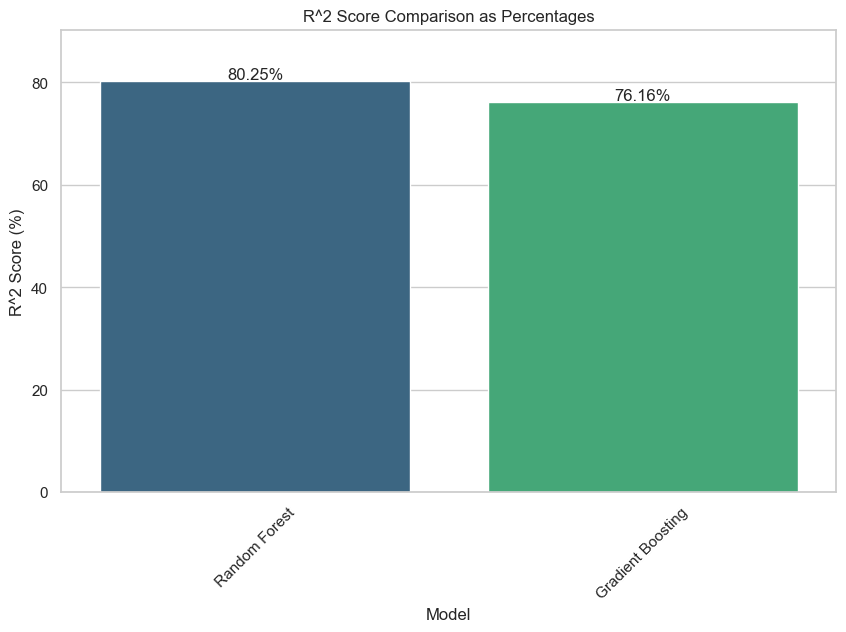

In [202]:
# Define models and their names
models = ['Random Forest', 'Gradient Boosting']
y_preds = [y_pred_rf, y_pred_gb]

# Calculate R² values and convert to percentages
r2_values = [r2_score(y_test, y_pred) * 100 for y_pred in y_preds]

# Create a DataFrame for easy plotting
metrics_df = pd.DataFrame({
    'Model': models,
    'R^2 Score (%)': r2_values
})

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='R^2 Score (%)', data=metrics_df, palette='viridis')

# Add value labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set y-axis limits to focus on the range of interest
plt.ylim(0, max(r2_values) + 10)  # Expand y-axis slightly above the maximum value

plt.title('R^2 Score Comparison as Percentages')
plt.ylabel('R^2 Score (%)')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

## Summary of odel Performance for Hyundai Car Price Prediction

By comparing the performance of the prediction Random Forest and Gradient Boosting are having the highest accuracies while SVR(Support Vector Regressor) and Linear Regression is not.

So, according to the performance we are using  Random Forest model which is having the highest accuracy over Gradient Boosting model.

## Save the Random Forest Model

In [203]:
# Save the rf_grid model to a file using pickle
model_filename = "model.pkl"
with open(model_filename, 'wb') as model_filename:
    pickle.dump(rf_grid, model_filename)

## Load the saved model

In [204]:
# Load the model from the file
model_filename = "model.pkl"
with open(model_filename, 'rb') as model_filename:
    loaded_model = pickle.load(model_filename)

In [205]:
# Load the saved model from the GB_model_file
loaded_model = pickle.load(open('model.pkl', 'rb'))
loaded_model

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2', verbose=2)

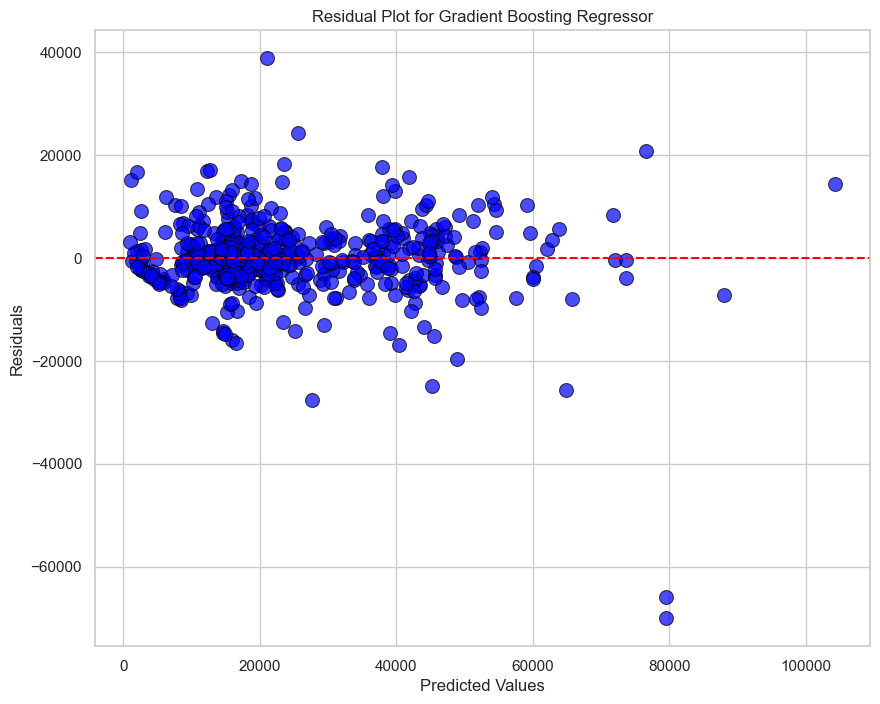

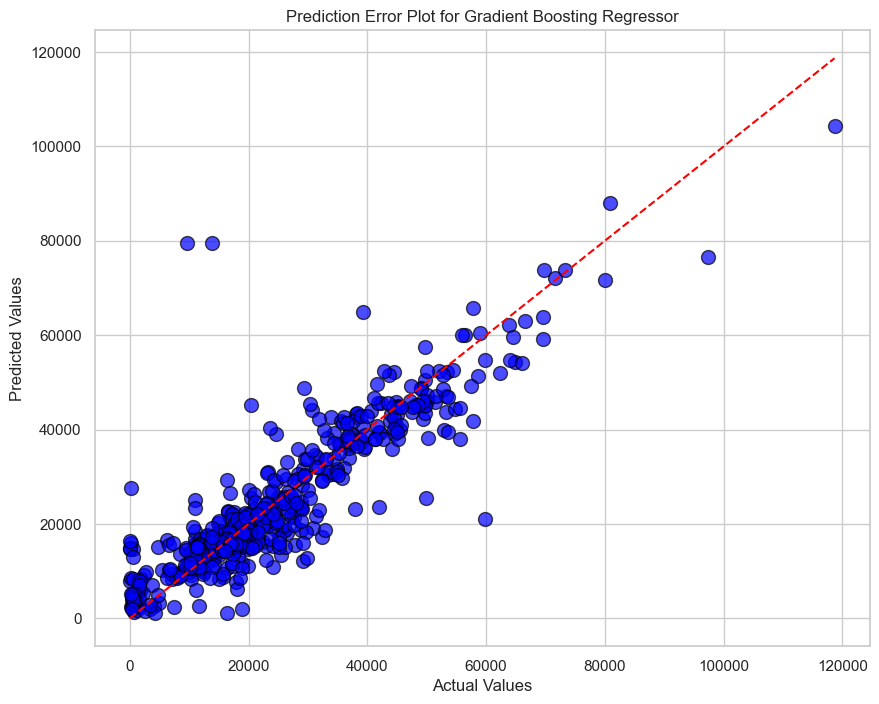

In [206]:
# Predict values
y_pred = loaded_model.predict(X_test_scaled)

# Calculate residuals
residuals = y_test - y_pred

# Residual Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_pred, y=residuals, color='blue', edgecolor='black', s=100, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Gradient Boosting Regressor')
plt.grid(True)
plt.show()

# Prediction Error Plot
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='blue', edgecolor='black', s=100, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction Error Plot for Gradient Boosting Regressor')
plt.grid(True)
plt.show()